In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [3]:
#install the ipython-sql library
!pip install ipython-sql

In [4]:
# To show all the columns
pd.set_option('display.max.rows',None,'display.max_columns', None)


In [5]:
inc= pd.read_csv("D:\GMU\DAEN690\TRACCC\Datasets\GRID_as_csv_tables\GRID_INCIDENTS.csv")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
inc.head()

unique_incident_id  incident_id  incident_seq incident_date  incident_day  \
0           180404900      1804049             0    2018-07-08             8   
1           180411700      1804117             0    2018-07-11            11   
2           180641700      1806417             0    2018-11-04             4   
3           180339200      1803392             0    2018-06-04             4   
4           180348900      1803489             0    2018-06-08             8   

   incident_month  incident_year  \
0               7           2018   
1               7           2018   
2              11           2018   
3               6           2018   
4               6           2018   

                                             summary  is_multi_source_corr  \
0  On July 8, 2018, on Buraydah-Tarfiyah Road, Al...                     0   
1  On July 11, 2018, in Arish, North Sinai, EGYPT...                     1   
2  On November 4, 2018, in Minya Governorate, EGY...                     1   
3  On June 4, 2018, in Kabul, AFGHANISTAN, a suic...                     0   
4  On June 8, 2018, in Jalalabad, Nangarhar Provi...                     1   

   is_assassination  is_ied  is_multi_day  is_multi_location  is_suicide  \
0                 0       0             0                  0           0   
1                 0       0             0                  0           0   
2                 0       0             0                  0           0   
3                 0       1             0                  0           1   
4                 0       0             0                  0           0   

  country_genc country_genc_txt country_nongenc_txt stateprovince_genc  \
0           SA     SAUDI ARABIA        SAUDI ARABIA              SA-05   
1           EG            EGYPT               EGYPT             EG-SIN   
2           EG            EGYPT               EGYPT              EG-MN   
3           AF      AFGHANISTAN         AFGHANISTAN             AF-KAB   
4           AF      AFGHANISTAN         AFGHANISTAN             AF-NAN   

  stateprovince_genc_txt stateprovince_nongenc                    city  \
0               Al Qasim                   NaN  Buraydah-Tarfiyah road   
1            Shamal Sina           North Sinai                Al-Arish   
2               Al Minya                   NaN                     NaN   
3                  Kabul                 Kabul                   Kabul   
4              Nangarhar             Nangarhar               Jalalabad   

   region       region_txt  claimed  num_killed  num_killed_perp  \
0     145     Western Asia        0           4                0   
1      15  Northern Africa        0          11                0   
2      15  Northern Africa        0          19                0   
3      34    Southern Asia        1           7                0   
4      34    Southern Asia        1           3                0   

   num_killed_us  num_wounded  num_wounded_us  num_hostkid  num_hostkid_us  \
0              0            1               0            0               0   
1              0            0               0            0               0   
2              0            0               0            0               0   
3              0            9               0            0               0   
4              0            5               0            0               0   

   tactic_lvl1_as  tactic_lvl1_co  tactic_lvl1_cv  tactic_lvl1_ex  \
0               1               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               1               0               1               0   
4               1               0               0               0   

   tactic_lvl1_tr  tactic_lvl1_un  tactic_lvl2_as_01  tactic_lvl2_as_02  \
0               0               0                  0                  0   
1               0               0             

In [7]:
inc.shape

(45613, 303)

In [8]:
#Datatypes of all the columns
inc.info(verbose = 'TRUE')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45613 entries, 0 to 45612
Data columns (total 303 columns):
 #    Column                      Dtype 
---   ------                      ----- 
 0    unique_incident_id          int64 
 1    incident_id                 int64 
 2    incident_seq                int64 
 3    incident_date               object
 4    incident_day                int64 
 5    incident_month              int64 
 6    incident_year               int64 
 7    summary                     object
 8    is_multi_source_corr        int64 
 9    is_assassination            int64 
 10   is_ied                      int64 
 11   is_multi_day                int64 
 12   is_multi_location           int64 
 13   is_suicide                  int64 
 14   country_genc                object
 15   country_genc_txt            object
 16   country_nongenc_txt         object
 17   stateprovince_genc          object
 18   stateprovince_genc_txt      object
 19   stateprovince_nongenc  

In [9]:
inc.isna().sum()

unique_incident_id                0
incident_id                       0
incident_seq                      0
incident_date                     0
incident_day                      0
incident_month                    0
incident_year                     0
summary                           0
is_multi_source_corr              0
is_assassination                  0
is_ied                            0
is_multi_day                      0
is_multi_location                 0
is_suicide                        0
country_genc                      0
country_genc_txt                  0
country_nongenc_txt               0
stateprovince_genc                0
stateprovince_genc_txt          803
stateprovince_nongenc         40076
city                           4182
region                            0
region_txt                        0
claimed                           0
num_killed                        0
num_killed_perp                   0
num_killed_us                     0
num_wounded                 

In [10]:
inc.describe()

unique_incident_id   incident_id  incident_seq  incident_day  \
count        4.561300e+04  4.561300e+04  45613.000000  45613.000000   
mean         1.578997e+08  1.578997e+06      0.261263     15.410431   
std          7.294984e+07  7.294984e+05      0.873142      8.774474   
min          2.303000e+05  2.303000e+03      0.000000      1.000000   
25%          1.801200e+08  1.801200e+06      0.000000      8.000000   
50%          1.911739e+08  1.911739e+06      0.000000     15.000000   
75%          2.022207e+08  2.022207e+06      0.000000     23.000000   
max          2.114855e+08  2.114855e+06     16.000000     31.000000   

       incident_month  incident_year  is_multi_source_corr  is_assassination  \
count    45613.000000   45613.000000          45613.000000      45613.000000   
mean         5.878872    2020.137899              0.222327          0.015434   
std          3.406877       1.503472              0.415814          0.123273   
min          1.000000    2018.000000              0.000000          0.000000   
25%          3.000000    2019.000000              0.000000          0.000000   
50%          5.000000    2020.000000              0.000000          0.000000   
75%          9.000000    2021.000000              0.000000          0.000000   
max         12.000000    2023.000000              1.000000          1.000000   

             is_ied  is_multi_day  is_multi_location    is_suicide  \
count  45613.000000  45613.000000       45613.000000  45613.000000   
mean       0.143862      0.033938           0.093964      0.017320   
std        0.350954      0.181071           0.291782      0.130461   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      0.000000   
max        1.000000      1.000000           1.000000      1.000000   

             region       claimed    num_killed  num_killed_perp  \
count  45613.000000  45613.000000  45613.000000     45613.000000   
mean     129.366343      0.112994      3.153728         0.579615   
std       85.886645      0.316589      8.219664         3.040073   
min       15.000000      0.000000      0.000000         0.000000   
25%       34.000000      0.000000      0.000000         0.000000   
50%      145.000000      0.000000      1.000000         0.000000   
75%      202.000000      0.000000      3.000000         0.000000   
max      419.000000      1.000000    386.000000       100.000000   

       num_killed_us   num_wounded  num_wounded_us   num_hostkid  \
count   45613.000000  45613.000000    45613.000000  45613.000000   
mean        0.003442      2.102734        0.006402      0.504856   
std         0.138778      7.232967        0.411141      4.357224   
min         0.000000      0.000000        0.000000      0.000000   
25%         0.000000      0.000000        0.000000      0.000000   
50%         0.000000      0.000000        0.000000      0.000000   
75%         0.000000      2.000000        0.000000      0.000000   
max        13.000000    600.000000       64.000000    300.000000   

       num_hostkid_us  tactic_lvl1_as  tactic_lvl1_co  tactic_lvl1_cv  \
count    45613.000000    45613.000000    45613.000000    45613.000000   
mean         0.000614        0.708263        0.022603        0.227917   
std          0.059960        0.454567        0.148636        0.419494   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        1.000000        0.000000        0.000000   
75%          0.000000        1.000000        0.000000        0.000000   
max         11.000000        1.000000        1.000000        1.000000   

       tactic_lvl1_ex  tactic_lvl1_tr  tactic_lvl1_un  tactic_lvl2_as_01  \
count    45613.000000    45613.000000    45613.000000  

In [11]:
perp = pd.read_csv("D:\GMU\DAEN690\TRACCC\Datasets\GRID_as_csv_tables\GRID_PERPS.csv")

In [12]:
perp.head()

perp_incident_id  perp_cd perp_name  \
0   000104E9-CDC1-814E-A6BF-693EAA72D518     9900   UNKNOWN   
1  000104E9-CDC1-814E-A6BF-693EAA72D5467     9900   UNKNOWN   
2   00014B6D-9169-4002-B3E2-D69D7C53E29F       45      ISIS   
3   0001EAAB-5914-0C4A-88DE-2DF88108D3EF     9900   UNKNOWN   
4   0003D9AF-E67E-4509-9936-029903863AC5     9900   UNKNOWN   

   unique_incident_id  incident_id  incident_seq incident_date  incident_day  \
0            22069500       220695             0    2022-03-19            19   
1           180485000      1804850             0    2018-08-18            18   
2            22201400       222014             0    2022-05-14            14   
3           202099300      2020993             0    2020-06-24            24   
4            22006301       220063             1    2022-01-06             6   

   incident_month  incident_year  \
0               3           2022   
1               8           2018   
2               5           2022   
3               6           2020   
4               1           2022   

                                             summary  is_multi_source_corr  \
0  On March 19, 2022, in Chat Kan, Panjgur, Baloc...                     0   
1  On August 18, 2018, in ‘Adan, YEMEN, Shabwani ...                     0   
2  On May 14, 2022, in Al Maqdadiyah City, Diyala...                     1   
3  On June 24, 2020, in Bossey Bangou, Tillabéri,...                     0   
4  On January 6, 2022, in Dera Ismail Khan, South...                     0   

   is_assassination  is_ied  is_multi_day  is_multi_location  is_suicide  \
0                 0       0             0                  0           0   
1                 0       0             0                  0           0   
2                 0       1             0                  0           0   
3                 0       0             0                  0           0   
4                 0       0             0                  0           0   

  country_genc country_genc_txt country_nongenc_txt stateprovince_genc  \
0           PK         PAKISTAN            PAKISTAN              PK-BA   
1           YE            YEMEN               YEMEN              YE-AD   
2           IQ             IRAQ                IRAQ              IQ-BB   
3           NE            NIGER               NIGER               NE-6   
4           PK         PAKISTAN            PAKISTAN              PK-KP   

  stateprovince_genc_txt stateprovince_nongenc  \
0            Balochistan                   NaN   
1                   Adan                   NaN   
2                  Babil                   NaN   
3              Tillaberi                   NaN   
4     Khyber Pakhtunkhwa                   NaN   

                                 city  region          region_txt  claimed  \
0                   Chat Kan, Panjgur      34       Southern Asia        0   
1                                 NaN     145        Western Asia        0   
2                       Al Maqdadiyah     145        Western Asia        0   
3                       Bossey Bangou     202  Sub-Saharan Africa        0   
4  Dera Ismail Khan, South Waziristan      34       Southern Asia        0   

   num_killed  num_killed_perp  num_killed_us  num_wounded  num_wounded_us  \
0           0                0              0            1               0   
1           1                0              0            2               0   
2           1                0              0            6               0   
3           0                0              0            0               0   
4           1                0              0            0               0   

   num_hostkid  num_hostkid_us  tactic_lvl1_as  tactic_lvl1_co  \
0            0               0               1               0   
1            0               0               1               0   
2            0               0               0               0   
3           10               0               0               0   
4      

In [13]:
perp.shape

(46829, 296)

In [14]:
#Datatypes of all the columns
perp.info(verbose = 'TRUE')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46829 entries, 0 to 46828
Data columns (total 296 columns):
 #    Column                      Dtype 
---   ------                      ----- 
 0    perp_incident_id            object
 1    perp_cd                     int64 
 2    perp_name                   object
 3    unique_incident_id          int64 
 4    incident_id                 int64 
 5    incident_seq                int64 
 6    incident_date               object
 7    incident_day                int64 
 8    incident_month              int64 
 9    incident_year               int64 
 10   summary                     object
 11   is_multi_source_corr        int64 
 12   is_assassination            int64 
 13   is_ied                      int64 
 14   is_multi_day                int64 
 15   is_multi_location           int64 
 16   is_suicide                  int64 
 17   country_genc                object
 18   country_genc_txt            object
 19   country_nongenc_txt    

In [15]:
perp.isna().sum()

perp_incident_id                  0
perp_cd                           0
perp_name                         0
unique_incident_id                0
incident_id                       0
incident_seq                      0
incident_date                     0
incident_day                      0
incident_month                    0
incident_year                     0
summary                           0
is_multi_source_corr              0
is_assassination                  0
is_ied                            0
is_multi_day                      0
is_multi_location                 0
is_suicide                        0
country_genc                      0
country_genc_txt                  0
country_nongenc_txt               0
stateprovince_genc                0
stateprovince_genc_txt          833
stateprovince_nongenc         41026
city                           4272
region                            0
region_txt                        0
claimed                           0
num_killed                  

In [16]:
perp.describe()

perp_cd  unique_incident_id   incident_id  incident_seq  \
count  46829.000000        4.682900e+04  4.682900e+04  46829.000000   
mean    3452.398364        1.578836e+08  1.578836e+06      0.270623   
std     4442.188056        7.296788e+07  7.296788e+05      0.888787   
min        3.000000        2.303000e+05  2.303000e+03      0.000000   
25%      173.000000        1.801201e+08  1.801201e+06      0.000000   
50%      634.000000        1.911728e+08  1.911728e+06      0.000000   
75%     9900.000000        2.022156e+08  2.022156e+06      0.000000   
max     9901.000000        2.114855e+08  2.114855e+06     16.000000   

       incident_day  incident_month  incident_year  is_multi_source_corr  \
count  46829.000000    46829.000000   46829.000000          46829.000000   
mean      15.405945        5.867454    2020.138568              0.222149   
std        8.780894        3.406440       1.502566              0.415695   
min        1.000000        1.000000    2018.000000              0.000000   
25%        8.000000        3.000000    2019.000000              0.000000   
50%       15.000000        5.000000    2020.000000              0.000000   
75%       23.000000        9.000000    2021.000000              0.000000   
max       31.000000       12.000000    2023.000000              1.000000   

       is_assassination        is_ied  is_multi_day  is_multi_location  \
count      46829.000000  46829.000000  46829.000000       46829.000000   
mean           0.015033      0.140938      0.035555           0.097034   
std            0.121687      0.347962      0.185180           0.296007   
min            0.000000      0.000000      0.000000           0.000000   
25%            0.000000      0.000000      0.000000           0.000000   
50%            0.000000      0.000000      0.000000           0.000000   
75%            0.000000      0.000000      0.000000           0.000000   
max            1.000000      1.000000      1.000000           1.000000   

         is_suicide        region       claimed    num_killed  \
count  46829.000000  46829.000000  46829.000000  46829.000000   
mean       0.017019    129.802345      0.113818      3.219116   
std        0.129345     85.973694      0.317594      8.396424   
min        0.000000     15.000000      0.000000      0.000000   
25%        0.000000     34.000000      0.000000      0.000000   
50%        0.000000    145.000000      0.000000      1.000000   
75%        0.000000    202.000000      0.000000      3.000000   
max        1.000000    419.000000      1.000000    386.000000   

       num_killed_perp  num_killed_us   num_wounded  num_wounded_us  \
count     46829.000000   46829.000000  46829.000000    46829.000000   
mean          0.606334       0.003374      2.105618        0.006235   
std           3.126029       0.137043      7.245850        0.405770   
min           0.000000       0.000000      0.000000        0.000000   
25%           0.000000       0.000000      0.000000        0.000000   
50%           0.000000       0.000000      0.000000        0.000000   
75%           0.000000       0.000000      2.000000        0.000000   
max         100.000000      13.000000    600.000000       64.000000   

        num_hostkid  num_hostkid_us  tactic_lvl1_as  tactic_lvl1_co  \
count  46829.000000    46829.000000    46829.000000    46829.000000   
mean       0.496466        0.000598        0.706186        0.022785   
std        4.304723        0.059176        0.455512        0.149219   
min        0.000000        0.000000        0.000000        0.000000   
25%        0.000000        0.000000        0.000000        0.000000   
50%        0.000000        0.000000        1.000000        0.000000   
75%        0.000000        0.000000        1.000000        0.000000   
max      300.000000       11.000000        1.000000        1.000000   

       tactic_lvl1_cv  tactic_lvl1_ex  tactic_lvl1_tr  tactic_lvl1_un  \
count    46829.000000    46829.000000    46829.000000    46829.000000   
mean    

In [18]:
source_df=pd.read_csv("D:\GMU\DAEN690\TRACCC\Datasets\GRID_SOURCE.csv")

In [19]:
source_df.head()

unique_incident_id  incident_id  incident_seq publication_date  \
0           180000000      1800000             0       01-01-2018   
1           180000100      1800001             0       01-01-2018   
2           180000200      1800002             0       02-01-2018   
3           180000300      1800003             0       02-01-2018   
4           180000400      1800004             0       01-01-2018   

                                            headline             publication  
0  AFP, PNP launch manhunt vs. BIFF in Maguindana...  Philippine News Agency  
1  Security officials among seven injured in succ...                Geo News  
2                Three killed in Adamawa bomb attack      Punch News Nigeria  
3  "Official  1 district police chief killed in T...                 13 WTHR  
4  "Gunman kills two Egyptian Christians at liquo...            The New Arab

In [21]:
source_df.shape

(45659, 6)

In [23]:
main_df = pd.read_csv("D:\GMU\DAEN690\TRACCC\Datasets\GRID_PERPS_ISIS_ALQAIDA.csv")

In [24]:
main_df.head()

perp_incident_id  perp_cd affiliated_organization  \
0  00014B6D-9169-4002-B3E2-D69D7C53E29F       45                    ISIS   
1  000DF60B-5EDF-684E-83A7-61E89B328ED1       77                Al-Qaeda   
2  000E3C66-953E-7040-986E-DCD9F431D9D3      712                Al-Qaeda   
3  001C8924-CBD4-7F43-A925-60DC664408AE       45                    ISIS   
4  001DB4ED-6A8D-3548-A7C4-902E932E1511       45                    ISIS   

                                     perp_name  unique_incident_id  \
0                                    ISIS-Core            22201400   
1              Tehrik-e-Taliban Pakistan (TTP)           202318200   
2  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)           202359302   
3                                    ISIS-Core           202387902   
4                                    ISIS-Core            22055600   

   incident_id  incident_seq     incident_date  incident_day  incident_month  \
0       222014             0  14-05-2022 00:00            14               5   
1      2023182             0  24-09-2020 00:00            24               9   
2      2023593             2  13-10-2020 00:00            13              10   
3      2023879             2  27-10-2020 00:00            27              10   
4       220556             0  27-02-2022 00:00            27               2   

   incident_year                                            summary  \
0           2022  On May 14, 2022, in Al Maqdadiyah City, Diyala...   
1           2020  On September 24, 2020, in Barjo Gat, Maidan, K...   
2           2020  On October 13, 2020, in Paroukou, Mopti, MALI,...   
3           2020  On October 27, 2020, in Al-Jailania, Muqdadiya...   
4           2022  On February 27, 2022, in Al-Rahjan, Hamah, SYR...   

   is_multi_source_corr  is_assassination  is_ied  is_multi_day  \
0                     1                 0       1             0   
1                     0                 0       0             0   
2                     0                 0       0             0   
3                     0                 0       0             0   
4                     0                 0       0             0   

   is_multi_location  is_suicide country_genc country_genc_txt  region  \
0                  0           0           IQ             IRAQ     145   
1                  0           0           PK         PAKISTAN      34   
2                  1           0           ML             MALI     202   
3                  0           0           IQ             IRAQ     145   
4                  0           0           SY            SYRIA     145   

           region_txt  claimed  num_killed  num_killed_perp  num_killed_us  \
0        Western Asia        0           1                0              0   
1       Southern Asia        1           0                0              0   
2  Sub-Saharan Africa        1          13               10              0   
3        Western Asia        0           3                0              0   
4        Western Asia        0           3                0              0   

   num_wounded  num_wounded_us  num_hostkid  num_hostkid_us  tactic_lvl1_as  \
0            6               0            0               0               0   
1            2               0            0               0               0   
2           10               0            0               0               1   
3            2               0            0               0               0   
4            0               0            0               0               0   

   tactic_lvl1_co  tactic_lvl1_cv  tactic_lvl1_ex  tactic_lvl1_tr  \
0               0               1               0               0   
1               0               1               0               0   
2               1               1               0               0   
3               0               1               0               0   
4               0               1               0               0   

   tactic_lvl1_un  tactic_lvl2

In [25]:
main_df.shape

(8773, 292)

In [26]:
#Datatypes of all the columns
main_df.info(verbose = 'TRUE')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 292 columns):
 #    Column                      Dtype 
---   ------                      ----- 
 0    perp_incident_id            object
 1    perp_cd                     int64 
 2    affiliated_organization     object
 3    perp_name                   object
 4    unique_incident_id          int64 
 5    incident_id                 int64 
 6    incident_seq                int64 
 7    incident_date               object
 8    incident_day                int64 
 9    incident_month              int64 
 10   incident_year               int64 
 11   summary                     object
 12   is_multi_source_corr        int64 
 13   is_assassination            int64 
 14   is_ied                      int64 
 15   is_multi_day                int64 
 16   is_multi_location           int64 
 17   is_suicide                  int64 
 18   country_genc                object
 19   country_genc_txt         

In [27]:
main_df.isna().sum()

perp_incident_id              0
perp_cd                       0
affiliated_organization       0
perp_name                     0
unique_incident_id            0
incident_id                   0
incident_seq                  0
incident_date                 0
incident_day                  0
incident_month                0
incident_year                 0
summary                       0
is_multi_source_corr          0
is_assassination              0
is_ied                        0
is_multi_day                  0
is_multi_location             0
is_suicide                    0
country_genc                  0
country_genc_txt              0
region                        0
region_txt                    0
claimed                       0
num_killed                    0
num_killed_perp               0
num_killed_us                 0
num_wounded                   0
num_wounded_us                0
num_hostkid                   0
num_hostkid_us                0
tactic_lvl1_as                0
tactic_l

In [28]:
main_df.describe()

perp_cd  unique_incident_id   incident_id  incident_seq  \
count  8773.000000        8.773000e+03  8.773000e+03   8773.000000   
mean    227.404309        1.604956e+08  1.604956e+06      0.279836   
std     349.324431        7.103282e+07  7.103282e+05      0.829655   
min       8.000000        2.200050e+07  2.200050e+05      0.000000   
25%      37.000000        1.801703e+08  1.801703e+06      0.000000   
50%      45.000000        1.911340e+08  1.911340e+06      0.000000   
75%     297.000000        2.022737e+08  2.022737e+06      0.000000   
max    1011.000000        2.114845e+08  2.114845e+06     11.000000   

       incident_day  incident_month  incident_year  is_multi_source_corr  \
count   8773.000000     8773.000000    8773.000000           8773.000000   
mean      15.420723        6.123675    2020.019036              0.276758   
std        8.798746        3.439975       1.413319              0.447421   
min        1.000000        1.000000    2018.000000              0.000000   
25%        8.000000        3.000000    2019.000000              0.000000   
50%       15.000000        6.000000    2020.000000              0.000000   
75%       23.000000        9.000000    2021.000000              1.000000   
max       31.000000       12.000000    2022.000000              1.000000   

       is_assassination       is_ied  is_multi_day  is_multi_location  \
count       8773.000000  8773.000000   8773.000000        8773.000000   
mean           0.018124     0.159125      0.036362           0.087199   
std            0.133407     0.365813      0.187199           0.282143   
min            0.000000     0.000000      0.000000           0.000000   
25%            0.000000     0.000000      0.000000           0.000000   
50%            0.000000     0.000000      0.000000           0.000000   
75%            0.000000     0.000000      0.000000           0.000000   
max            1.000000     1.000000      1.000000           1.000000   

        is_suicide       region      claimed   num_killed  num_killed_perp  \
count  8773.000000  8773.000000  8773.000000  8773.000000      8773.000000   
mean      0.039667   157.487177     0.238573     4.206999         0.701584   
std       0.195187    55.866796     0.426235    10.408506         3.489950   
min       0.000000    15.000000     0.000000     0.000000         0.000000   
25%       0.000000   145.000000     0.000000     0.000000         0.000000   
50%       0.000000   145.000000     0.000000     2.000000         0.000000   
75%       0.000000   202.000000     0.000000     4.000000         0.000000   
max       1.000000   202.000000     1.000000   386.000000        80.000000   

       num_killed_us  num_wounded  num_wounded_us  num_hostkid  \
count    8773.000000  8773.000000     8773.000000  8773.000000   
mean        0.003534     2.349937        0.007067     0.490368   
std         0.154316     8.458717        0.486194     4.101461   
min         0.000000     0.000000        0.000000     0.000000   
25%         0.000000     0.000000        0.000000     0.000000   
50%         0.000000     0.000000        0.000000     0.000000   
75%         0.000000     2.000000        0.000000     0.000000   
max        13.000000   200.000000       45.000000   171.000000   

       num_hostkid_us  tactic_lvl1_as  tactic_lvl1_co  tactic_lvl1_cv  \
count     8773.000000     8773.000000     8773.000000     8773.000000   
mean         0.000570        0.687906        0.031346        0.243132   
std          0.044019        0.463374        0.174261        0.428999   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        1.000000        0.000000        0.000000   
75%          0.000000        1.000000        0.000000        0.000000   
max          4.000000        1.000000        1.000000        1.000000   

       tactic_lvl1_ex  tactic_lvl1_tr  tactic_lvl1_un  tactic_lvl2_as_01  \
count

In [29]:
#we will create sqlite3 library and create a connection
cnn=sqlite3.connect('tracc.db')

In [30]:
#Creating a cursor object using the cursor() method
cursor = cnn.cursor()

#Doping EMPLOYEE table if already exists
cursor.execute("DROP TABLE GRID_PERPS_ISIS_ALQAIDA")

#Commit your changes in the database
cnn.commit()

In [31]:
main_df.to_sql('GRID_PERPS_ISIS_ALQAIDA',cnn)

In [32]:
#load the sql module to ipython
%load_ext sql

In [33]:
%sql sqlite:///tracc.db

In [34]:
total_count= %sql select affiliated_organization,incident_year,perp_name, count(unique_incident_id) as incident_count from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,incident_year,perp_name order by affiliated_organization,incident_year,incident_count desc;
total_count

 * sqlite:///tracc.db
Done.


[('Al-Qaeda', 2018, 'al-Shabaab', 535),
 ('Al-Qaeda', 2018, "Hay'at Tahrir al-Sham", 128),
 ('Al-Qaeda', 2018, 'Lashkar-e Tayyiba (LeT)', 59),
 ('Al-Qaeda', 2018, 'Tehrik-e-Taliban Pakistan (TTP)', 45),
 ('Al-Qaeda', 2018, "Jama'at Nusrat al-Islam wal-Muslimin (JNIM)", 25),
 ('Al-Qaeda', 2019, 'al-Shabaab', 484),
 ('Al-Qaeda', 2019, "Hay'at Tahrir al-Sham", 140),
 ('Al-Qaeda', 2019, "Jama'at Nusrat al-Islam wal-Muslimin (JNIM)", 55),
 ('Al-Qaeda', 2019, 'Tehrik-e-Taliban Pakistan (TTP)', 28),
 ('Al-Qaeda', 2019, 'Lashkar-e Tayyiba (LeT)', 24),
 ('Al-Qaeda', 2020, 'al-Shabaab', 477),
 ('Al-Qaeda', 2020, "Hay'at Tahrir al-Sham", 139),
 ('Al-Qaeda', 2020, 'Lashkar-e Tayyiba (LeT)', 44),
 ('Al-Qaeda', 2020, "Jama'at Nusrat al-Islam wal-Muslimin (JNIM)", 44),
 ('Al-Qaeda', 2020, 'Tehrik-e-Taliban Pakistan (TTP)', 22),
 ('Al-Qaeda', 2020, 'Ahrar al-Sharqiya', 15),
 ('Al-Qaeda', 2021, 'al-Shabaab', 290),
 ('Al-Qaeda', 2021, "Hay'at Tahrir al-Sham", 51),
 ('Al-Qaeda', 2021, 'Lashkar-e Tayyiba (LeT)', 50),
 ('Al-Qaeda', 2021, "Jama'at Nusrat al-Islam wal-Muslimin (JNIM)", 50),
 ('Al-Qaeda', 2021, 'Tehrik-e-Taliban Pakistan (TTP)', 38),
 ('Al-Qaeda', 2021, 'Ahrar al-Sharqiya', 10),
 ('Al-Qaeda', 2022, 'al-Shabaab', 248),
 ('Al-Qaeda', 2022, "Hay'at Tahrir al-Sham", 76),
 ('Al-Qaeda', 2022, "Jama'at Nusrat al-Islam wal-Muslimin (JNIM)", 72),
 ('Al-Qaeda', 2022, 'Lashkar-e Tayyiba (LeT)', 48),
 ('Al-Qaeda', 2022, 'Tehrik-e-Taliban Pakistan (TTP)', 34),
 ('Al-Qaeda', 2022, 'Ahrar al-Sharqiya', 10),
 ('ISIS', 2018, 'ISIS-Core', 613),
 ('ISIS', 2018, 'ISIS-Khorasan (ISIS-K)', 105),
 ('ISIS', 2018, 'Bangsamoro Islamic Freedom Movement (BIFM)', 61),
 ('ISIS', 2018, 'ISIS-Sinai Province (ISIS-SP)', 55),
 ('ISIS', 2018, 'ISIS-DRC (formerly ADF)', 55),
 ('ISIS', 2018, 'ISIS-West Africa (ISIS-WA)', 20),
 ('ISIS', 2018, 'ISIS-Greater Sahara (ISIS-GS)', 18),
 ('ISIS', 2018, 'Maute Group', 7),
 ('ISIS', 2019, 'ISIS-Core', 585),
 ('ISIS', 2019, 'ISIS-DRC (formerly ADF)', 97),
 ('ISIS', 2019, 'ISIS-West Africa (ISIS-WA)', 89),
 ('ISIS', 2019, 'ISIS-Sinai Province (ISIS-SP)', 74),
 ('ISIS', 2019, 'ISIS-Khorasan (ISIS-K)', 56),
 ('ISIS', 2019, 'Bangsamoro Islamic Freedom Movement (BIFM)', 37),
 ('ISIS', 2019, 'ISIS-Greater Sahara (ISIS-GS)', 17),
 ('ISIS', 2019, 'ISIS-Mozambique (ISIS-M)', 10),
 ('ISIS', 2019, 'Maute Group', 4),
 ('ISIS', 2020, 'ISIS-Core', 506),
 ('ISIS', 2020, 'ISIS-DRC (formerly ADF)', 275),
 ('ISIS', 2020, 'ISIS-West Africa (ISIS-WA)', 98),
 ('ISIS', 2020, 'ISIS-Mozambique (ISIS-M)', 87),
 ('ISIS', 2020, 'Bangsamoro Islamic Freedom Movement (BIFM)', 33),
 ('ISIS', 2020, 'ISIS-Sinai Province (ISIS-SP)', 31),
 ('ISIS', 2020, 'ISIS-Greater Sahara (ISIS-GS)', 27),
 ('ISIS', 2020, 'ISIS-Khorasan (ISIS-K)', 22),
 ('ISIS', 2020, 'Maute Group', 9),
 ('ISIS', 2021, 'ISIS-Core', 645),
 ('ISIS', 2021, 'ISIS-DRC (formerly ADF)', 325),
 ('ISIS', 2021, 'ISIS-West Africa (ISIS-WA)', 102),
 ('ISIS', 2021, 'ISIS-Mozambique (ISIS-M)', 42),
 ('ISIS', 2021, 'ISIS-Khorasan (ISIS-K)', 42),
 ('ISIS', 2021, 'ISIS-Sinai Province (ISIS-SP)', 29),
 ('ISIS', 2021, 'Bangsamoro Islamic Freedom Movement (BIFM)', 17),
 ('ISIS', 2021, 'ISIS-Greater Sahara (ISIS-GS)', 14),
 ('ISIS', 2021, 'Maute Group', 12),
 ('ISIS', 2022, 'ISIS-Core', 536),
 ('ISIS', 2022, 'ISIS-DRC (formerly ADF)', 298),
 ('ISIS', 2022, 'ISIS-Mozambique (ISIS-M)', 187),
 ('ISIS', 2022, 'ISIS-West Africa (ISIS-WA)', 112),
 ('ISIS', 2022, 'ISIS-Sinai Province (ISIS-SP)', 66),
 ('ISIS', 2022, 'ISIS-Khorasan (ISIS-K)', 56),
 ('ISIS', 2022, 'ISIS-Greater Sahara (ISIS-GS)', 41),
 ('ISIS', 2022, 'Bangsamoro Islamic Freedom Movement (BIFM)', 11),
 ('ISIS', 2022, 'Maute Group', 6)]

In [35]:
total_query= "select affiliated_organization,incident_year,perp_name, count(unique_incident_id) as incident_count from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,incident_year,perp_name order by affiliated_organization,incident_year,incident_count;"


In [36]:
perp_count_query=pd.read_sql_query(total_query,cnn)
perp_count_query

affiliated_organization  incident_year  \
0                 Al-Qaeda           2018   
1                 Al-Qaeda           2018   
2                 Al-Qaeda           2018   
3                 Al-Qaeda           2018   
4                 Al-Qaeda           2018   
5                 Al-Qaeda           2019   
6                 Al-Qaeda           2019   
7                 Al-Qaeda           2019   
8                 Al-Qaeda           2019   
9                 Al-Qaeda           2019   
10                Al-Qaeda           2020   
11                Al-Qaeda           2020   
12                Al-Qaeda           2020   
13                Al-Qaeda           2020   
14                Al-Qaeda           2020   
15                Al-Qaeda           2020   
16                Al-Qaeda           2021   
17                Al-Qaeda           2021   
18                Al-Qaeda           2021   
19                Al-Qaeda           2021   
20                Al-Qaeda           2021   
21                Al-Qaeda           2021   
22                Al-Qaeda           2022   
23                Al-Qaeda           2022   
24                Al-Qaeda           2022   
25                Al-Qaeda           2022   
26                Al-Qaeda           2022   
27                Al-Qaeda           2022   
28                    ISIS           2018   
29                    ISIS           2018   
30                    ISIS           2018   
31                    ISIS           2018   
32                    ISIS           2018   
33                    ISIS           2018   
34                    ISIS           2018   
35                    ISIS           2018   
36                    ISIS           2019   
37                    ISIS           2019   
38                    ISIS           2019   
39                    ISIS           2019   
40                    ISIS           2019   
41                    ISIS           2019   
42                    ISIS           2019   
43                    ISIS           2019   
44                    ISIS           2019   
45                    ISIS           2020   
46                    ISIS           2020   
47                    ISIS           2020   
48                    ISIS           2020   
49                    ISIS           2020   
50                    ISIS           2020   
51                    ISIS           2020   
52                    ISIS           2020   
53                    ISIS           2020   
54                    ISIS           2021   
55                    ISIS           2021   
56                    ISIS           2021   
57                    ISIS           2021   
58                    ISIS           2021   
59                    ISIS           2021   
60                    ISIS           2021   
61                    ISIS           2021   
62                    ISIS           2021   
63                    ISIS           2022   
64                    ISIS           2022   
65                    ISIS           2022   
66                    ISIS           2022   
67                    ISIS           2022   
68                    ISIS           2022   
69                    ISIS           2022   
70                    ISIS           2022   
71                    ISIS           2022   

                                      perp_name  incident_count  
0   Jama'at Nusrat al-Islam wal-Muslimin (JNIM)              25  
1               Tehrik-e-Taliban Pakistan (TTP)              45  
2                       Lashkar-e Tayyiba (LeT)              59  
3                         Hay'at Tahrir al-Sham             128  
4                                    al-Shabaab             535  
5                       Lashkar-e Tayyiba (LeT)              24  
6               Tehrik-e-Taliban Pakistan (TTP)              28  
7   Jama'at Nusrat al-Islam wal-Muslimin (JNIM)              55  
8                         Hay'at Tahrir al-Sham             140  
9                                    al-Shabaab          

In [37]:
aq_perps = perp_count_query[perp_count_query['affiliated_organization']=='Al-Qaeda']
aq_perps.head()


affiliated_organization  incident_year  \
0                Al-Qaeda           2018   
1                Al-Qaeda           2018   
2                Al-Qaeda           2018   
3                Al-Qaeda           2018   
4                Al-Qaeda           2018   

                                     perp_name  incident_count  
0  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)              25  
1              Tehrik-e-Taliban Pakistan (TTP)              45  
2                      Lashkar-e Tayyiba (LeT)              59  
3                        Hay'at Tahrir al-Sham             128  
4                                   al-Shabaab             535

In [38]:
# Sorting the DataFrame based on 'incident_count' in ascending order
aq_perps = aq_perps.sort_values(by='incident_count', ascending=True)
aq_perps.reset_index(drop=True, inplace=True)
aq_perps

affiliated_organization  incident_year  \
0                 Al-Qaeda           2022   
1                 Al-Qaeda           2021   
2                 Al-Qaeda           2020   
3                 Al-Qaeda           2020   
4                 Al-Qaeda           2019   
5                 Al-Qaeda           2018   
6                 Al-Qaeda           2019   
7                 Al-Qaeda           2022   
8                 Al-Qaeda           2021   
9                 Al-Qaeda           2020   
10                Al-Qaeda           2020   
11                Al-Qaeda           2018   
12                Al-Qaeda           2022   
13                Al-Qaeda           2021   
14                Al-Qaeda           2021   
15                Al-Qaeda           2021   
16                Al-Qaeda           2019   
17                Al-Qaeda           2018   
18                Al-Qaeda           2022   
19                Al-Qaeda           2022   
20                Al-Qaeda           2018   
21                Al-Qaeda           2020   
22                Al-Qaeda           2019   
23                Al-Qaeda           2022   
24                Al-Qaeda           2021   
25                Al-Qaeda           2020   
26                Al-Qaeda           2019   
27                Al-Qaeda           2018   

                                      perp_name  incident_count  
0                             Ahrar al-Sharqiya              10  
1                             Ahrar al-Sharqiya              10  
2                             Ahrar al-Sharqiya              15  
3               Tehrik-e-Taliban Pakistan (TTP)              22  
4                       Lashkar-e Tayyiba (LeT)              24  
5   Jama'at Nusrat al-Islam wal-Muslimin (JNIM)              25  
6               Tehrik-e-Taliban Pakistan (TTP)              28  
7               Tehrik-e-Taliban Pakistan (TTP)              34  
8               Tehrik-e-Taliban Pakistan (TTP)              38  
9   Jama'at Nusrat al-Islam wal-Muslimin (JNIM)              44  
10                      Lashkar-e Tayyiba (LeT)              44  
11              Tehrik-e-Taliban Pakistan (TTP)              45  
12                      Lashkar-e Tayyiba (LeT)              48  
13                      Lashkar-e Tayyiba (LeT)              50  
14  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)              50  
15                        Hay'at Tahrir al-Sham              51  
16  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)              55  
17                      Lashkar-e Tayyiba (LeT)              59  
18  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)              72  
19                        Hay'at Tahrir al-Sham              76  
20                        Hay'at Tahrir al-Sham             128  
21                        Hay'at Tahrir al-Sham             139  
22                        Hay'at Tahrir al-Sham             140  
23                                   al-Shabaab             248  
24                                   al-Shabaab             290  
25                                   al-Shabaab             477  
26                                   al-Shabaab             484  
27                                   al-Shabaab             535

In [39]:
isis_perps = perp_count_query[perp_count_query['affiliated_organization']=='ISIS']
isis_perps

affiliated_organization  incident_year  \
28                    ISIS           2018   
29                    ISIS           2018   
30                    ISIS           2018   
31                    ISIS           2018   
32                    ISIS           2018   
33                    ISIS           2018   
34                    ISIS           2018   
35                    ISIS           2018   
36                    ISIS           2019   
37                    ISIS           2019   
38                    ISIS           2019   
39                    ISIS           2019   
40                    ISIS           2019   
41                    ISIS           2019   
42                    ISIS           2019   
43                    ISIS           2019   
44                    ISIS           2019   
45                    ISIS           2020   
46                    ISIS           2020   
47                    ISIS           2020   
48                    ISIS           2020   
49                    ISIS           2020   
50                    ISIS           2020   
51                    ISIS           2020   
52                    ISIS           2020   
53                    ISIS           2020   
54                    ISIS           2021   
55                    ISIS           2021   
56                    ISIS           2021   
57                    ISIS           2021   
58                    ISIS           2021   
59                    ISIS           2021   
60                    ISIS           2021   
61                    ISIS           2021   
62                    ISIS           2021   
63                    ISIS           2022   
64                    ISIS           2022   
65                    ISIS           2022   
66                    ISIS           2022   
67                    ISIS           2022   
68                    ISIS           2022   
69                    ISIS           2022   
70                    ISIS           2022   
71                    ISIS           2022   

                                     perp_name  incident_count  
28                                 Maute Group               7  
29               ISIS-Greater Sahara (ISIS-GS)              18  
30                  ISIS-West Africa (ISIS-WA)              20  
31                     ISIS-DRC (formerly ADF)              55  
32               ISIS-Sinai Province (ISIS-SP)              55  
33  Bangsamoro Islamic Freedom Movement (BIFM)              61  
34                      ISIS-Khorasan (ISIS-K)             105  
35                                   ISIS-Core             613  
36                                 Maute Group               4  
37                    ISIS-Mozambique (ISIS-M)              10  
38               ISIS-Greater Sahara (ISIS-GS)              17  
39  Bangsamoro Islamic Freedom Movement (BIFM)              37  
40                      ISIS-Khorasan (ISIS-K)              56  
41               ISIS-Sinai Province (ISIS-SP)              74  
42                  ISIS-West Africa (ISIS-WA)              89  
43                     ISIS-DRC (formerly ADF)              97  
44                                   ISIS-Core             585  
45                                 Maute Group               9  
46                      ISIS-Khorasan (ISIS-K)              22  
47               ISIS-Greater Sahara (ISIS-GS)              27  
48               ISIS-Sinai Province (ISIS-SP)              31  
49  Bangsamoro Islamic Freedom Movement (BIFM)              33  
50                    ISIS-Mozambique (ISIS-M)              87  
51                  ISIS-West Africa (ISIS-WA)              98  
52                     ISIS-DRC (formerly ADF)             275  
53                                   ISIS-Core             506  
54                                 Maute Group              12  
55               ISIS-Greater Sahara (ISIS-GS)              14  
56  Bangsamoro Islamic Freedom Movement (BIFM)              17  
57               ISIS-Sinai

In [40]:
import matplotlib.style as style 
style.use('ggplot')

In [41]:
sns.set(style="darkgrid")

In [42]:
terr_count=perp_count_query.groupby('incident_year')

In [43]:
!pip install ffmpeg-python

In [44]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
print(animation.writers.list())


['pillow', 'html']


In [45]:
!pip install bar_chart_race

In [46]:
from matplotlib.animation import FuncAnimation
%matplotlib qt
# Update function for the animation
def update(year):
    plt.cla()
    year_data = aq_perps[aq_perps['incident_year'] == year]
    bars=plt.barh(year_data['perp_name'], year_data['incident_count'],color='skyblue')
    plt.title(f"Number of Incidents by Al-Qaeda's perpetrators in {year}")
    plt.xlabel("Number of Incidents")
    #plt.yticks(rotation=45, ha="right")
    plt.xlim(0, aq_perps['incident_count'].max() + 10)
    plt.tight_layout()
    # Annotate each bar with its value
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 9,        # Set the text at 9 units right of the bar
                 bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                 '{:1.0f}'.format(width),             # Format the value
                 ha="center",                          # Horizontal alignment
                 va="center",fontweight="bold", fontsize=10, color="black")     # Vertical alignment
# Creating the animation
fig=plt.figure(figsize=(10,6))
years = sorted(aq_perps['incident_year'].unique())
ani = FuncAnimation(fig, update, frames=years, interval=2000)

# Displaying the animation
plt.show()

# Uncomment to save the animation
ani.save('aq_incident_animation.gif', writer='pillow')



In [47]:
from matplotlib.animation import FuncAnimation
%matplotlib qt

# Update function for the animation
def update(year):
    plt.cla()
    year_data = isis_perps[isis_perps['incident_year'] == year]
    bars=plt.barh(year_data['perp_name'], year_data['incident_count'],color='coral')
    plt.title(f"Number of Incidents by ISIS's perpetrators in {year}")
    plt.xlabel("Number of Incidents")
    #plt.yticks(rotation=50, ha="right")
    plt.xlim(0, isis_perps['incident_count'].max() + 10)
    plt.tight_layout()
    # Annotate each bar with its value
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 9,        # Set the text at 9 units right of the bar
                 bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                 '{:1.0f}'.format(width),             # Format the value
                 ha="center",                          # Horizontal alignment
                 va="center",fontweight="bold", fontsize=10, color="black")     # Vertical alignment

    
# Creating the animation
fig=plt.figure(figsize=(10,6))
years = sorted(isis_perps['incident_year'].unique())
ani = FuncAnimation(fig, update, frames=years, interval=2000)

# Displaying the animation
plt.show()

# Uncomment to save the animation
ani.save('isis_incident_animation.gif', writer='pillow')



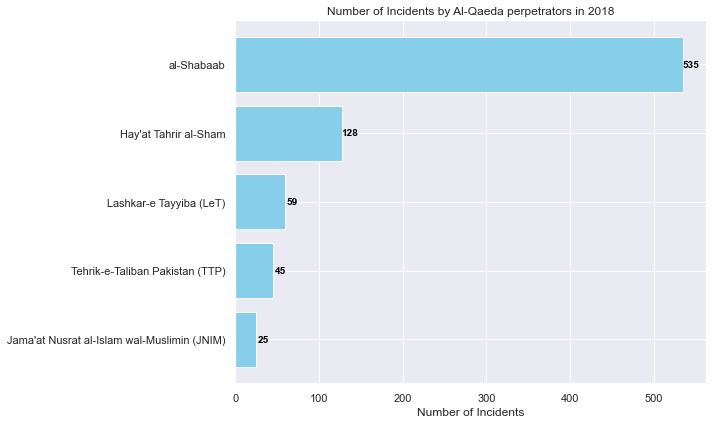

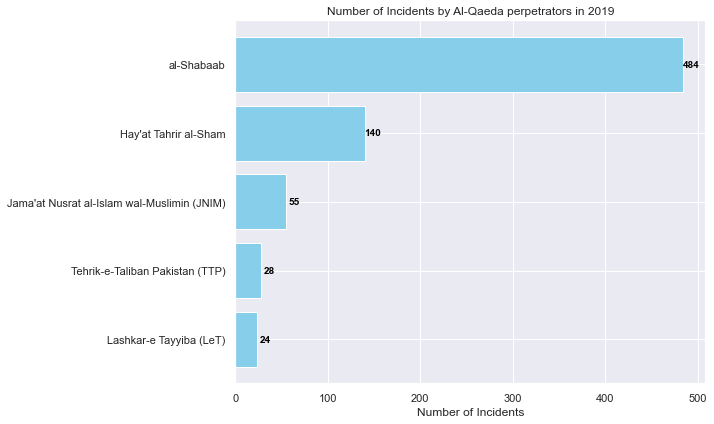

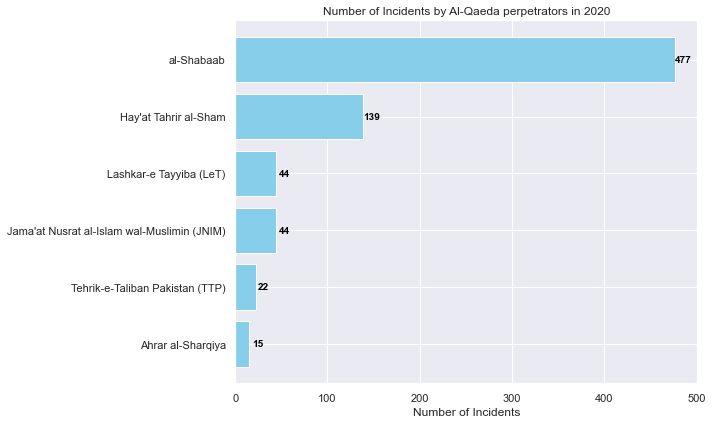

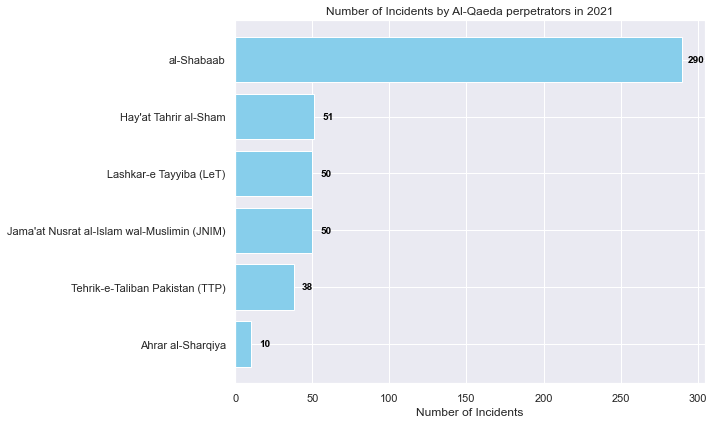

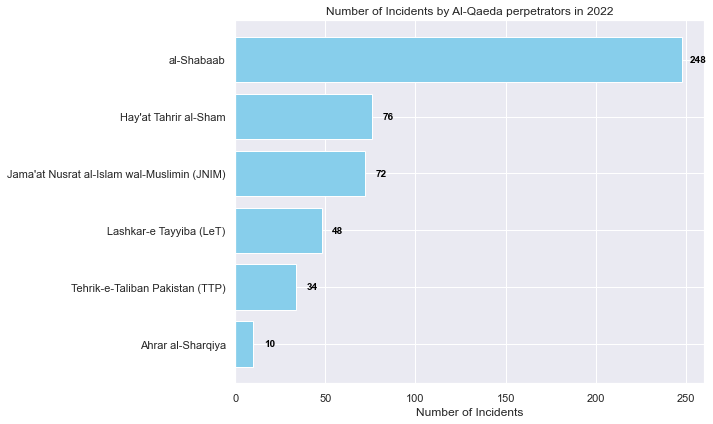

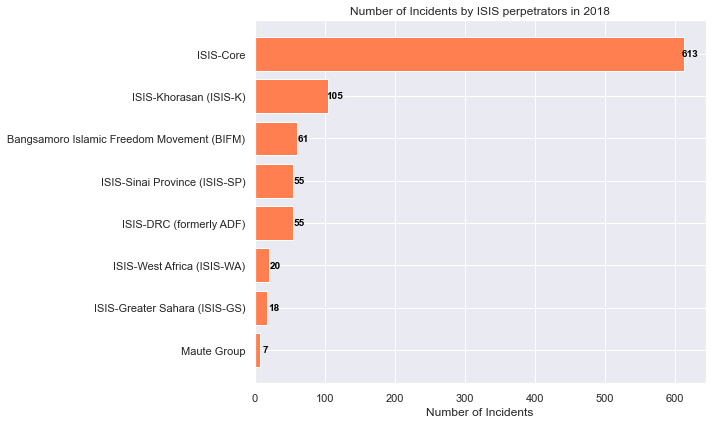

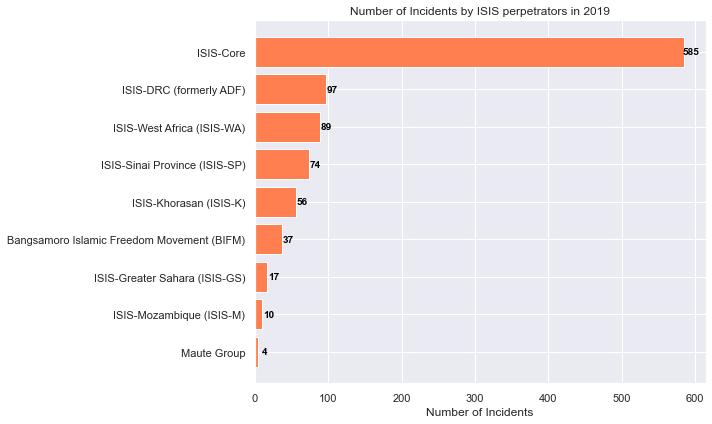

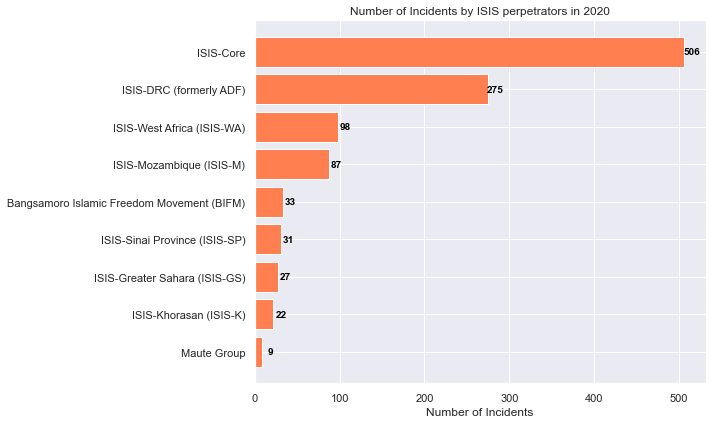

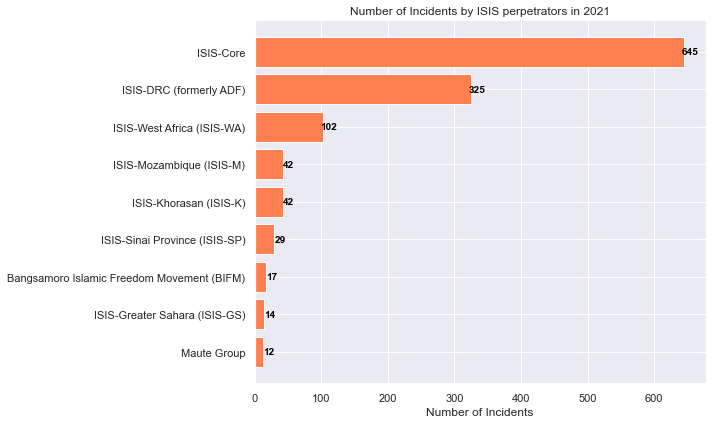

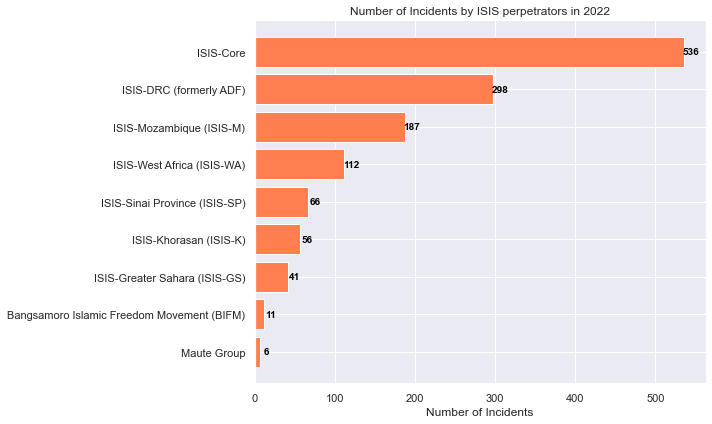

In [48]:
#How has the number of incidents changed over the years?
%matplotlib inline
#Get unique organizations in the DataFrame
orgs = perp_count_query['affiliated_organization'].unique()
# Get unique years in the DataFrame
years = perp_count_query['incident_year'].unique()
colors=['skyblue','coral']
i=0
# Create separate bar plots for each year
for org in orgs:
    #Filter the data for the organization
    org_data=perp_count_query[perp_count_query['affiliated_organization']== org]
    for year in years:
        # Filter the data for the current year
        year_data = org_data[org_data['incident_year'] == year]
        # Create a bar plot
        plt.figure(figsize=(10, 6))
        ax=plt.barh(year_data['perp_name'], year_data['incident_count'], color=colors[i])
        plt.xlabel('Number of Incidents')
        #plt.ylabel('Incident Count')
        plt.title(f'Number of Incidents by {org} perpetrators in {year}')
        plt.grid('TRUE',axis='x')
        # Annotate each bar with its value
        for bar in ax:
            width = bar.get_width()
            plt.text(width + 9,        # Set the text at 9 units right of the bar
                     bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                     '{:1.0f}'.format(width),             # Format the value
                     ha="center",                          # Horizontal alignment
                     va="center",fontweight="bold", fontsize=10, color="black")     # Vertical alignment
        #plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    i+=1

In [49]:
org_query="select affiliated_organization,incident_year, count(unique_incident_id) as incident_count from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,incident_year order by affiliated_organization,incident_year,incident_count;"
org_count_query=pd.read_sql_query(org_query,cnn)
org_count_query

affiliated_organization  incident_year  incident_count
0                Al-Qaeda           2018             792
1                Al-Qaeda           2019             731
2                Al-Qaeda           2020             741
3                Al-Qaeda           2021             489
4                Al-Qaeda           2022             488
5                    ISIS           2018             934
6                    ISIS           2019             969
7                    ISIS           2020            1088
8                    ISIS           2021            1228
9                    ISIS           2022            1313

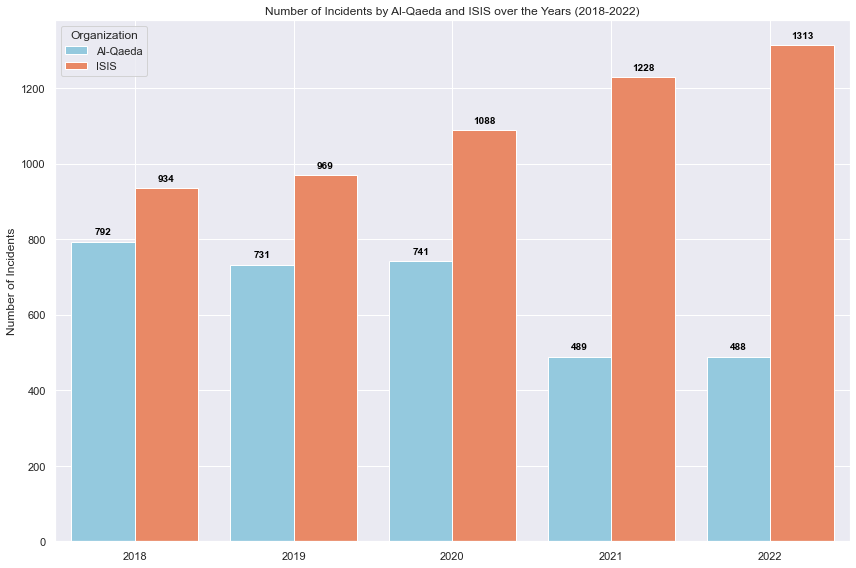

In [50]:

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=org_count_query, x="incident_year", y="incident_count", hue="affiliated_organization", palette=['skyblue','coral'])

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',fontweight="bold", fontsize=10, color="black", xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.legend(title="Organization")
plt.title("Number of Incidents by Al-Qaeda and ISIS over the Years (2018-2022)")
plt.grid("TRUE")
plt.xlabel("")
plt.ylabel("Number of Incidents")

plt.tight_layout()
plt.show()


In [51]:
casualty_query="select affiliated_organization,incident_year, sum(num_killed) as People_Killed,sum(num_wounded) as People_Wounded , sum(num_hostkid) as People_Kidnapped from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,incident_year order by affiliated_organization,incident_year,count(*) desc;"
casualty=pd.read_sql_query(casualty_query,cnn)
casualty

affiliated_organization  incident_year  People_Killed  People_Wounded  \
0                Al-Qaeda           2018           2835            2053   
1                Al-Qaeda           2019           2752            1789   
2                Al-Qaeda           2020           2328            1069   
3                Al-Qaeda           2021           1963            1377   
4                Al-Qaeda           2022           2260            1590   
5                    ISIS           2018           6008            3734   
6                    ISIS           2019           3443            2437   
7                    ISIS           2020           4894            1780   
8                    ISIS           2021           4880            2407   
9                    ISIS           2022           5545            2380   

   People_Kidnapped  
0               148  
1               317  
2               271  
3                86  
4                41  
5               437  
6               410  
7               676  
8              1184  
9               732

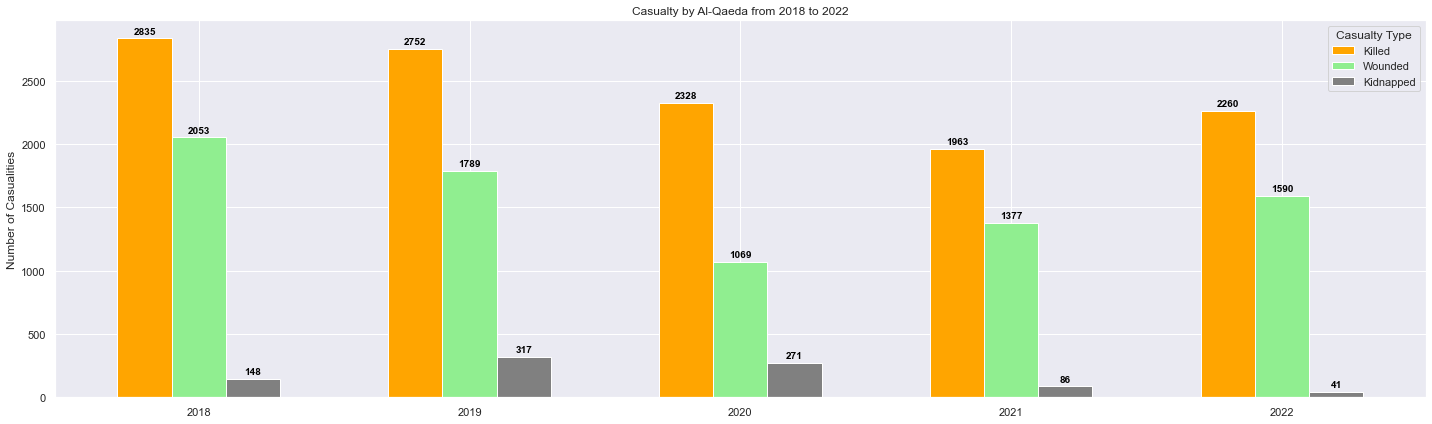

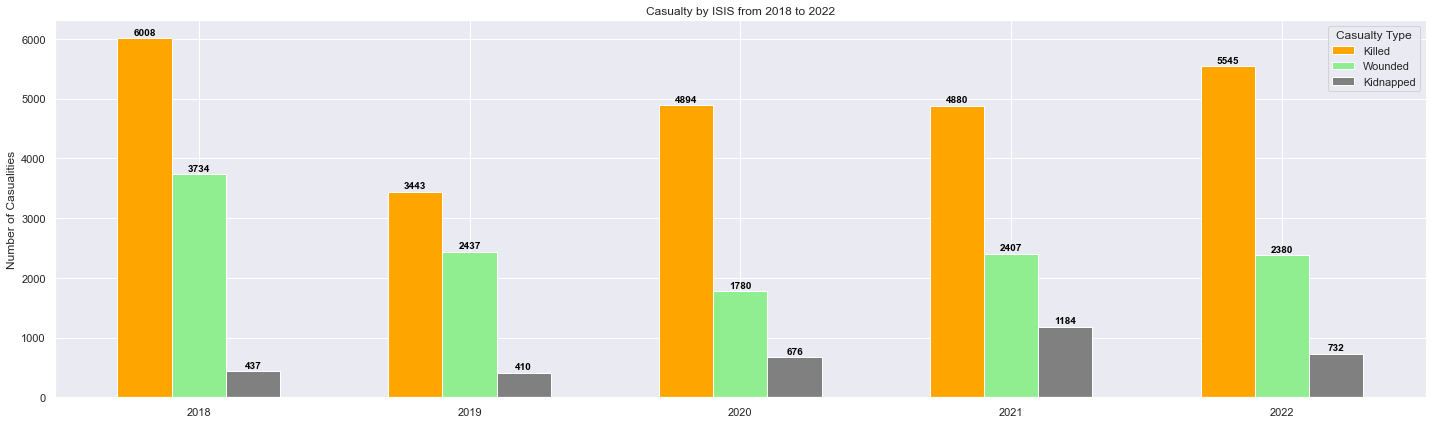

In [52]:
# Get unique organizations
orgs = casualty['affiliated_organization'].unique()

# Get unique years
years = casualty['incident_year'].unique()

# Create an array for the x-axis positions
x = np.arange(len(years))

# Define custom colors for the bars
colors = ['orange', 'lightgreen', 'grey']

# Create the grouped bar plot with custom colors
for org in orgs:
    plt.figure(figsize=(20, 6))  # Moved this inside the loop to create separate plots for each org
    org_data = casualty[casualty['affiliated_organization'] == org]
    
    # Define bar width for each organization and variable
    bar_width = 0.2  # Adjust the width as needed
    
    # Offset the x positions for each variable
    x_offset = x - bar_width
    
    # Create and annotate bars for 'People_killed'
    heights_killed = org_data['People_Killed'].values
    bars1 = plt.bar(x_offset, heights_killed, bar_width, color=colors[0])
    for bar in bars1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 20, '{:.0f}'.format(yval), ha="center", va="bottom", fontweight="bold", fontsize=10, color="black")
    
    # Create and annotate bars for 'People_wounded'
    heights_wounded = org_data['People_Wounded'].values
    bars2 = plt.bar(x, heights_wounded, bar_width, color=colors[1])
    for bar in bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 20, '{:.0f}'.format(yval), ha="center", va="bottom", fontweight="bold", fontsize=10, color="black")
    
    # Create and annotate bars for 'People_kidnapped'
    x_offset = x + bar_width
    heights_kidnapped = org_data['People_Kidnapped'].values
    bars3 = plt.bar(x_offset, heights_kidnapped, bar_width, color=colors[2])
    for bar in bars3:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 20, '{:.0f}'.format(yval), ha="center", va="bottom", fontweight="bold", fontsize=10, color="black")
    
    # Set labels, title, and customize x-axis ticks and labels
    #plt.xlabel('Year')
    plt.ylabel('Number of Casualities')
    plt.grid("TRUE")
    plt.title(f'Casualty by {org} from 2018 to 2022')
    plt.xticks(x, years)
    plt.legend(['Killed', 'Wounded', 'Kidnapped'],title="Casualty Type")
    plt.tight_layout()
    plt.show()


In [53]:
top_perps_query="select affiliated_organization,perp_name, count(unique_incident_id) as incident_count from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,perp_name order by incident_count desc limit 10;"
top_perps=pd.read_sql_query(top_perps_query,cnn)
top_perps

affiliated_organization                                    perp_name  \
0                    ISIS                                    ISIS-Core   
1                Al-Qaeda                                   al-Shabaab   
2                    ISIS                      ISIS-DRC (formerly ADF)   
3                Al-Qaeda                        Hay'at Tahrir al-Sham   
4                    ISIS                   ISIS-West Africa (ISIS-WA)   
5                    ISIS                     ISIS-Mozambique (ISIS-M)   
6                    ISIS                       ISIS-Khorasan (ISIS-K)   
7                    ISIS                ISIS-Sinai Province (ISIS-SP)   
8                Al-Qaeda  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)   
9                Al-Qaeda                      Lashkar-e Tayyiba (LeT)   

   incident_count  
0            2885  
1            2034  
2            1050  
3             534  
4             421  
5             326  
6             281  
7             255  
8             246  
9             225

In [54]:
# Sorting the DataFrame based on 'incident_count' in ascending order
top_perps = top_perps.sort_values(by='incident_count', ascending=True)
top_perps.reset_index(drop=True, inplace=True)
top_perps

affiliated_organization                                    perp_name  \
0                Al-Qaeda                      Lashkar-e Tayyiba (LeT)   
1                Al-Qaeda  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)   
2                    ISIS                ISIS-Sinai Province (ISIS-SP)   
3                    ISIS                       ISIS-Khorasan (ISIS-K)   
4                    ISIS                     ISIS-Mozambique (ISIS-M)   
5                    ISIS                   ISIS-West Africa (ISIS-WA)   
6                Al-Qaeda                        Hay'at Tahrir al-Sham   
7                    ISIS                      ISIS-DRC (formerly ADF)   
8                Al-Qaeda                                   al-Shabaab   
9                    ISIS                                    ISIS-Core   

   incident_count  
0             225  
1             246  
2             255  
3             281  
4             326  
5             421  
6             534  
7            1050  
8            2034  
9            2885

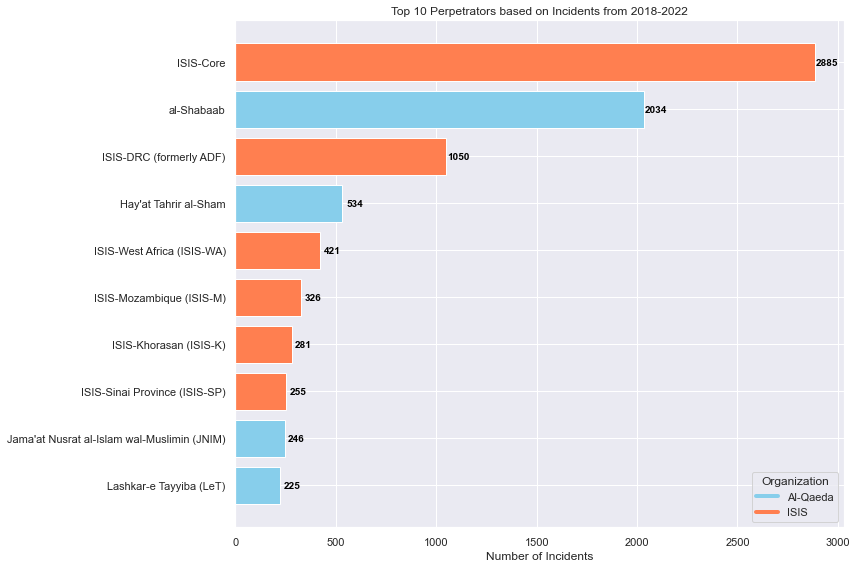

In [55]:

# Plotting the barh graph
plt.figure(figsize=(12, 8))
colors = top_perps['affiliated_organization'].map({'Al-Qaeda': 'skyblue', 'ISIS': 'coral'})
ax= plt.barh(top_perps['perp_name'], top_perps['incident_count'], color=colors)
plt.title('Top 10 Perpetrators based on Incidents from 2018-2022')
plt.xlabel('Number of Incidents')
#plt.ylabel('Perpetrator Name')
handles = [plt.Line2D([0], [0], color='skyblue', lw=4, label='Al-Qaeda'), plt.Line2D([0], [0], color='coral', lw=4, label='ISIS')]
plt.legend(handles=handles,title="Organization")
plt.grid("TRUE",axis='x')
for bar in ax:
            width = bar.get_width()
            plt.text(width + 60,        # Set the text at 9 units right of the bar
                     bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                     '{:1.0f}'.format(width),             # Format the value
                     ha="center",                          # Horizontal alignment
                     va="center",fontweight="bold", fontsize=10, color="black")  # Vertical alignment
plt.tight_layout()
plt.show()


In [56]:
deadliest_total_query="select affiliated_organization,perp_name,sum(num_killed) as killed_count,count(unique_incident_id) as incident_count from GRID_PERPS_ISIS_ALQAIDA where num_killed> (select avg(num_killed) from GRID_PERPS_ISIS_ALQAIDA ) group by affiliated_organization,perp_name order by killed_count;"
deadliest_total=pd.read_sql_query(deadliest_total_query,cnn)
deadliest_total

affiliated_organization                                    perp_name  \
0                 Al-Qaeda                            Ahrar al-Sharqiya   
1                     ISIS                                  Maute Group   
2                 Al-Qaeda                      Lashkar-e Tayyiba (LeT)   
3                     ISIS   Bangsamoro Islamic Freedom Movement (BIFM)   
4                 Al-Qaeda              Tehrik-e-Taliban Pakistan (TTP)   
5                     ISIS                ISIS-Sinai Province (ISIS-SP)   
6                     ISIS                     ISIS-Mozambique (ISIS-M)   
7                     ISIS                ISIS-Greater Sahara (ISIS-GS)   
8                 Al-Qaeda  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)   
9                 Al-Qaeda                        Hay'at Tahrir al-Sham   
10                    ISIS                       ISIS-Khorasan (ISIS-K)   
11                    ISIS                   ISIS-West Africa (ISIS-WA)   
12                    ISIS                      ISIS-DRC (formerly ADF)   
13                Al-Qaeda                                   al-Shabaab   
14                    ISIS                                    ISIS-Core   

    killed_count  incident_count  
0             20               1  
1             41               6  
2            109              16  
3            184              20  
4            471              47  
5            772              63  
6            908              89  
7           1272              48  
8           1596              91  
9           1675              92  
10          2575             122  
11          3324             208  
12          4182             415  
13          5236             444  
14          6247             426

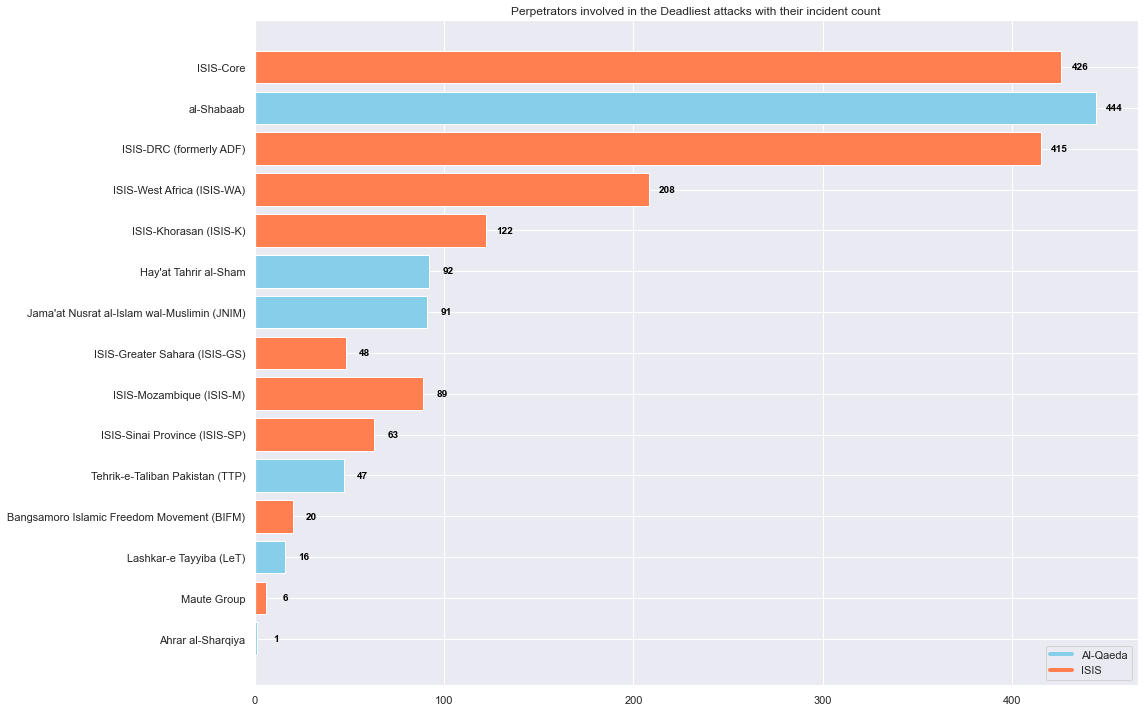

In [57]:

# Plotting the barh graph
plt.figure(figsize=(16, 10))
colors = deadliest_total['affiliated_organization'].map({'Al-Qaeda': 'skyblue', 'ISIS': 'coral'})
ax= plt.barh(deadliest_total['perp_name'], deadliest_total['incident_count'], color=colors)
plt.title('Perpetrators involved in the Deadliest attacks with their incident count')
#plt.xlabel('Incident Count')
#plt.ylabel('Perpetrator Name')
handles = [plt.Line2D([0], [0], color='skyblue', lw=4, label='Al-Qaeda'), plt.Line2D([0], [0], color='coral', lw=4, label='ISIS')]
plt.legend(handles=handles,loc='lower right')

plt.grid("TRUE",axis='x')
for bar in ax:
            width = bar.get_width()
            plt.text(width + 10,        
                     bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                     '{:1.0f}'.format(width),             # Format the value
                     ha="center",                          # Horizontal alignment
                     va="center",fontweight="bold", fontsize=10, color="black")  # Vertical alignment
plt.tight_layout()
plt.show()


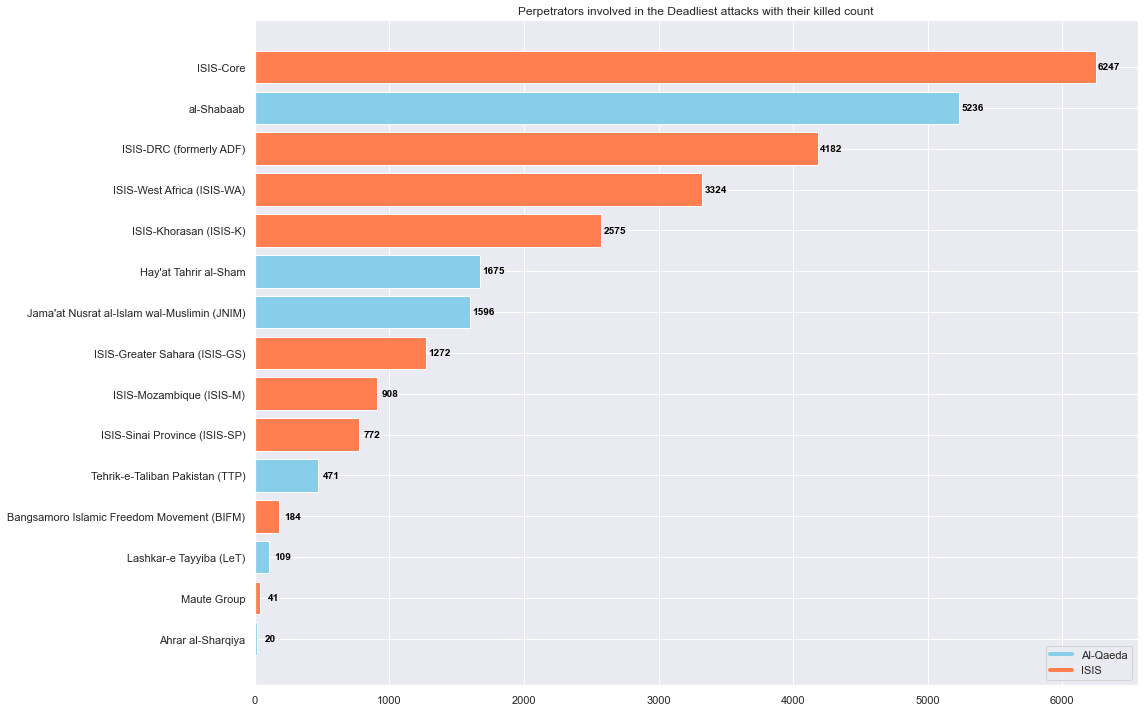

In [58]:

# Plotting the barh graph
plt.figure(figsize=(16, 10))
colors = deadliest_total['affiliated_organization'].map({'Al-Qaeda': 'skyblue', 'ISIS': 'coral'})
ax= plt.barh(deadliest_total['perp_name'], deadliest_total['killed_count'], color=colors)
plt.title('Perpetrators involved in the Deadliest attacks with their killed count')
#plt.xlabel('Incident Count')
#plt.ylabel('Perpetrator Name')
handles = [plt.Line2D([0], [0], color='skyblue', lw=4, label='Al-Qaeda'), plt.Line2D([0], [0], color='coral', lw=4, label='ISIS')]
plt.legend(handles=handles,loc='lower right')

plt.grid("TRUE",axis='x')
for bar in ax:
            width = bar.get_width()
            plt.text(width + 100,        
                     bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                     '{:1.0f}'.format(width),             # Format the value
                     ha="center",                          # Horizontal alignment
                     va="center",fontweight="bold", fontsize=10, color="black")  # Vertical alignment
plt.tight_layout()
plt.show()


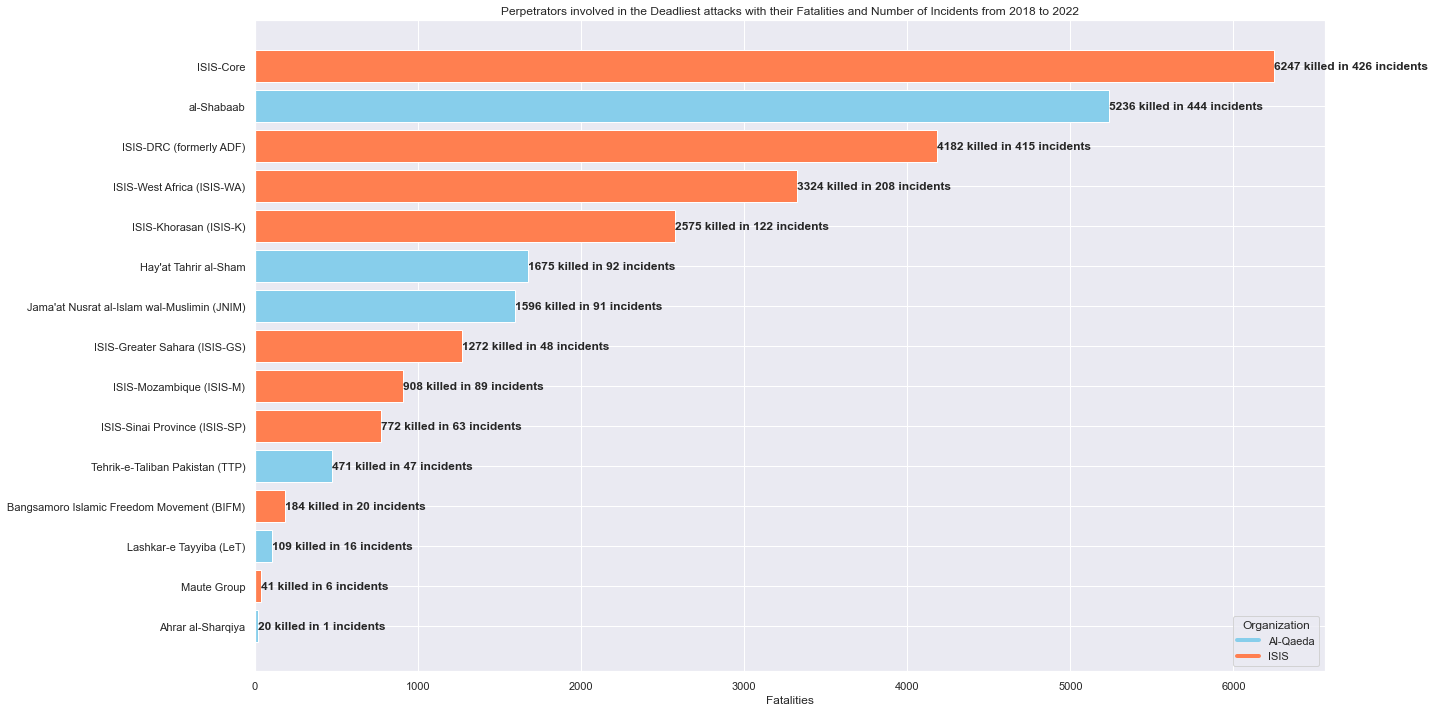

In [59]:
df=deadliest_total
# Define colors for each organization
colors = df['affiliated_organization'].map({"Al-Qaeda": "skyblue", "ISIS": "coral"})

# Plot
plt.figure(figsize=(20, 10))
bars = plt.barh(df['perp_name'], df['killed_count'], color=colors)

# Label the bars
for bar, killed, incident in zip(bars, df['killed_count'], df['incident_count']):
    plt.text(
        bar.get_width(),  # X position, here at the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Y position, in the middle of the bar
        f'{killed} killed in {incident} incidents',  # The label text
        va='center',  # Center alignment
        ha='left',# Left alignment
        fontweight="bold",
        fontsize=12,  # Font size
    )

# Customize the plot
plt.xlabel('Fatalities')
plt.grid('true',axis='x')
plt.title('Perpetrators involved in the Deadliest attacks with their Fatalities and Number of Incidents from 2018 to 2022')
plt.tight_layout()
handles = [plt.Line2D([0], [0], color='skyblue', lw=4, label='Al-Qaeda'), plt.Line2D([0], [0], color='coral', lw=4, label='ISIS')]
plt.legend(handles=handles,loc='lower right',title="Organization")
# Show the plot
plt.show()


In [60]:
us_citizens_query="select affiliated_organization,incident_year,perp_name, sum(num_killed_us) as us_citizens_killed from GRID_PERPS_ISIS_ALQAIDA where num_killed_us > 0 group by affiliated_organization,incident_year,perp_name order by affiliated_organization,incident_year,us_citizens_killed desc;"
us_citizens=pd.read_sql_query(us_citizens_query,cnn)
us_citizens

affiliated_organization  incident_year                        perp_name  \
0                Al-Qaeda           2018                       al-Shabaab   
1                Al-Qaeda           2018  Tehrik-e-Taliban Pakistan (TTP)   
2                Al-Qaeda           2019                       al-Shabaab   
3                Al-Qaeda           2020                       al-Shabaab   
4                    ISIS           2018                        ISIS-Core   
5                    ISIS           2018           ISIS-Khorasan (ISIS-K)   
6                    ISIS           2019                        ISIS-Core   
7                    ISIS           2021           ISIS-Khorasan (ISIS-K)   

   us_citizens_killed  
0                   1  
1                   1  
2                   1  
3                   3  
4                   4  
5                   1  
6                   7  
7                  13

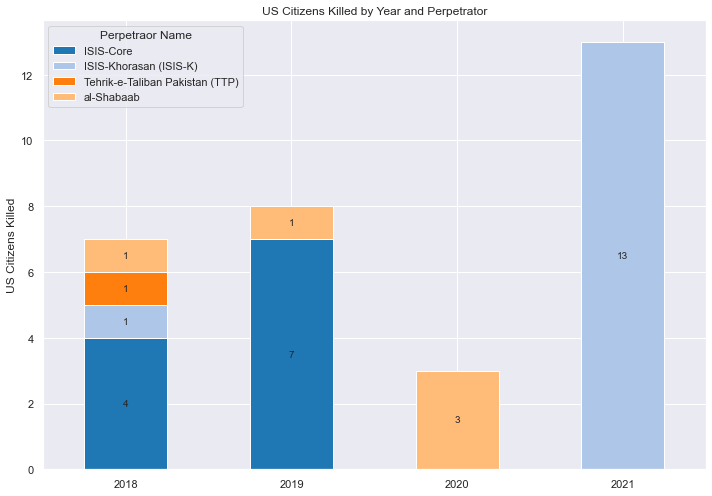

In [61]:
#Which perpetrators are more involved in the killing of  American citizens?

df=us_citizens

# Pivot the data to get the values for the stacked bars
pivot_df = df.pivot_table(index='incident_year', columns='perp_name', values='us_citizens_killed',aggfunc='sum', fill_value=0)


# Define a color map for perp_name
colors = plt.cm.tab20.colors  # Using tab20 colormap for diversity in colors

ax=pivot_df.plot(kind='bar', stacked=True, color=colors[:pivot_df.columns.size], figsize=(10,7))

# Set plot labels and title
ax.set_xlabel('')
ax.set_ylabel('US Citizens Killed')
ax.set_title('US Citizens Killed by Year and Perpetrator')

# Place the legend inside the plot, on the upper right corner
plt.legend(title='Perpetraor Name', loc='upper left')
plt.grid('TRUE')
# Adding the values on top of the stacked bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only print the label if there is a height (value) to the bar
        ax.text(x+width/2, 
                y+height/2, 
                str(int(height)), 
                ha='center', 
                va='center')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


In [62]:
us_citizens_perp_query="select affiliated_organization,perp_name, sum(num_killed_us) as us_citizens_killed from GRID_PERPS_ISIS_ALQAIDA where num_killed_us > 0 group by affiliated_organization,perp_name order by affiliated_organization,us_citizens_killed desc;"
us_citizens_perp=pd.read_sql_query(us_citizens_perp_query,cnn)
us_citizens_perp

affiliated_organization                        perp_name  us_citizens_killed
0                Al-Qaeda                       al-Shabaab                   5
1                Al-Qaeda  Tehrik-e-Taliban Pakistan (TTP)                   1
2                    ISIS           ISIS-Khorasan (ISIS-K)                  14
3                    ISIS                        ISIS-Core                  11

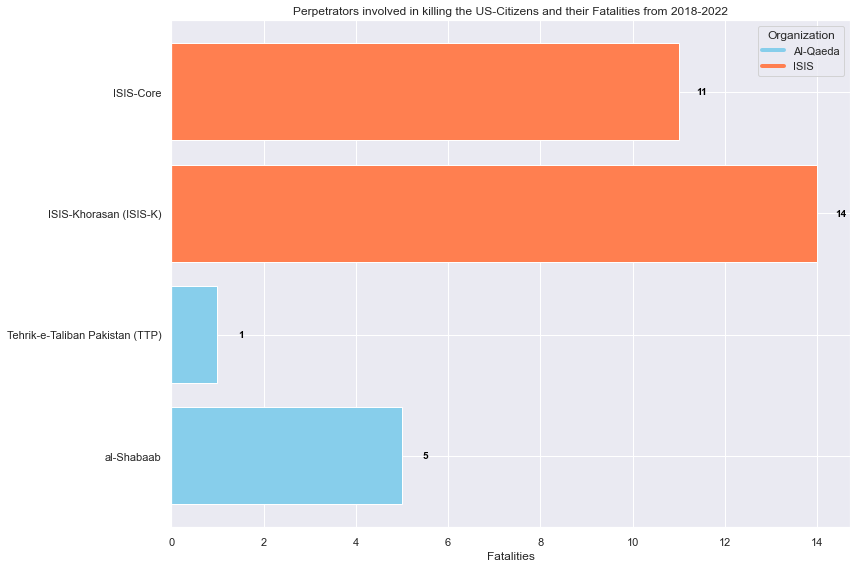

In [63]:

# Plotting the barh graph
plt.figure(figsize=(12, 8))
colors = us_citizens_perp['affiliated_organization'].map({'Al-Qaeda': 'skyblue', 'ISIS': 'coral'})
ax= plt.barh(us_citizens_perp['perp_name'], us_citizens_perp['us_citizens_killed'], color=colors)
plt.title('Perpetrators involved in killing the US-Citizens and their Fatalities from 2018-2022')
plt.xlabel('Fatalities')
#plt.ylabel('Perpetrator Name')
handles = [plt.Line2D([0], [0], color='skyblue', lw=4, label='Al-Qaeda'), plt.Line2D([0], [0], color='coral', lw=4, label='ISIS')]
plt.legend(handles=handles,title="Organization")
plt.grid("TRUE",axis='x')
for bar in ax:
            width = bar.get_width()
            plt.text(width + 0.5,        # Set the text at 2 units right of the bar
                     bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                     '{:1.0f}'.format(width),             # Format the value
                     ha="center",                          # Horizontal alignment
                     va="center",fontweight="bold", fontsize=10, color="black")  # Vertical alignment
plt.tight_layout()
plt.show()


In [64]:
multiday_query="select affiliated_organization,perp_name,count(is_multi_day) as count_multiday from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,perp_name,is_multi_day having is_multi_day = 1 order by count_multiday;"
multiday=pd.read_sql_query(multiday_query,cnn)
multiday

affiliated_organization                                    perp_name  \
0                 Al-Qaeda                            Ahrar al-Sharqiya   
1                 Al-Qaeda              Tehrik-e-Taliban Pakistan (TTP)   
2                     ISIS                                  Maute Group   
3                     ISIS   Bangsamoro Islamic Freedom Movement (BIFM)   
4                     ISIS                ISIS-Greater Sahara (ISIS-GS)   
5                     ISIS                ISIS-Sinai Province (ISIS-SP)   
6                     ISIS                       ISIS-Khorasan (ISIS-K)   
7                 Al-Qaeda  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)   
8                     ISIS                   ISIS-West Africa (ISIS-WA)   
9                 Al-Qaeda                      Lashkar-e Tayyiba (LeT)   
10                Al-Qaeda                                   al-Shabaab   
11                    ISIS                     ISIS-Mozambique (ISIS-M)   
12                Al-Qaeda                        Hay'at Tahrir al-Sham   
13                    ISIS                                    ISIS-Core   
14                    ISIS                      ISIS-DRC (formerly ADF)   

    count_multiday  
0                2  
1                2  
2                3  
3                6  
4                7  
5                7  
6                9  
7               11  
8               13  
9               22  
10              22  
11              36  
12              46  
13              64  
14              69

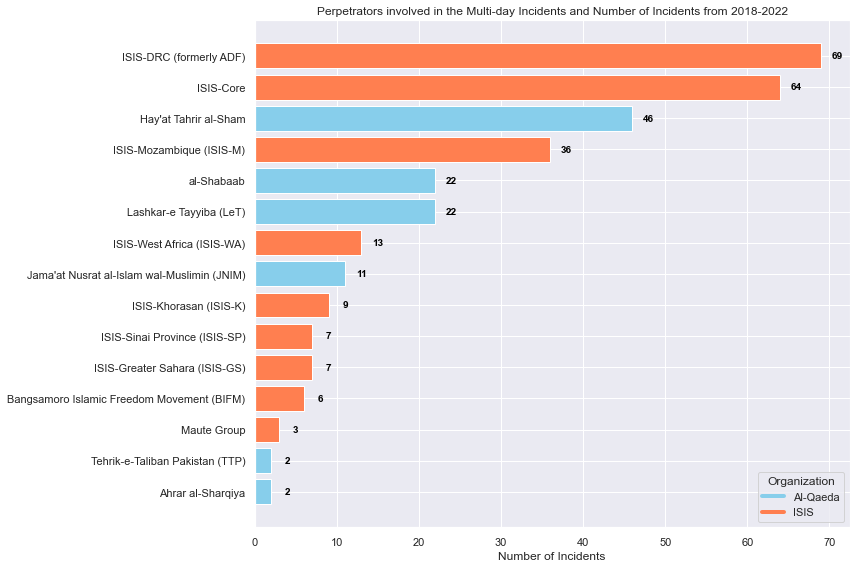

In [65]:

# Plotting the barh graph
plt.figure(figsize=(12, 8))
colors = multiday['affiliated_organization'].map({'Al-Qaeda': 'skyblue', 'ISIS': 'coral'})
ax= plt.barh(multiday['perp_name'], multiday['count_multiday'], color=colors)
plt.title('Perpetrators involved in the Multi-day Incidents and Number of Incidents from 2018-2022')
plt.xlabel('Number of Incidents')
#plt.ylabel('Perpetrator Name')
handles = [plt.Line2D([0], [0], color='skyblue', lw=4, label='Al-Qaeda'), plt.Line2D([0], [0], color='coral', lw=4, label='ISIS')]
plt.legend(handles=handles,title="Organization")
plt.grid("TRUE",axis='x')
for bar in ax:
            width = bar.get_width()
            plt.text(width + 2,        # Set the text at 2 units right of the bar
                     bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                     '{:1.0f}'.format(width),             # Format the value
                     ha="center",                          # Horizontal alignment
                     va="center",fontweight="bold", fontsize=10, color="black")  # Vertical alignment
plt.tight_layout()
plt.show()


In [66]:
org_multiday_query="select affiliated_organization,incident_year, count(is_multi_day) as count_multiday from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,incident_year,is_multi_day having is_multi_day =1 order by affiliated_organization,incident_year,count_multiday desc;"
org_multiday=pd.read_sql_query(org_multiday_query,cnn)
org_multiday

affiliated_organization  incident_year  count_multiday
0                Al-Qaeda           2018              20
1                Al-Qaeda           2019              35
2                Al-Qaeda           2020              24
3                Al-Qaeda           2021              11
4                Al-Qaeda           2022              15
5                    ISIS           2018              46
6                    ISIS           2019              45
7                    ISIS           2020              56
8                    ISIS           2021              27
9                    ISIS           2022              40

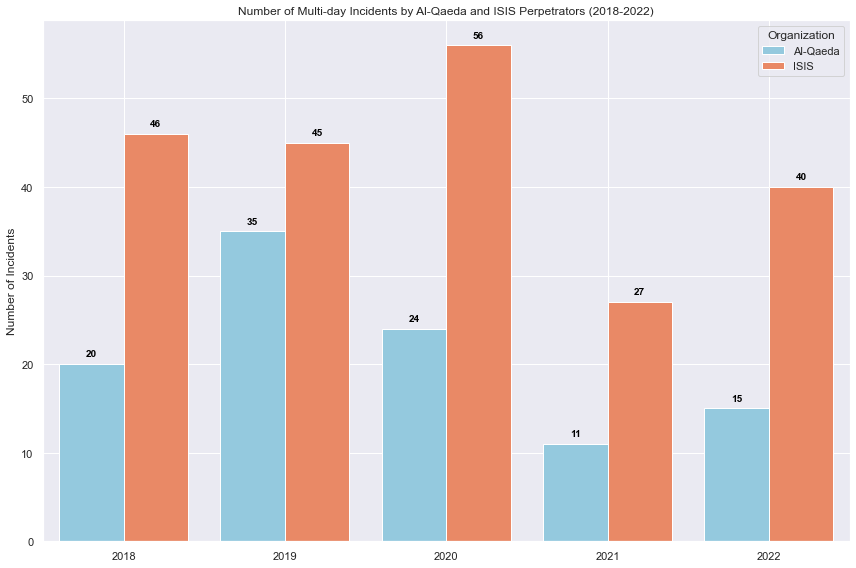

In [67]:

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=org_multiday, x="incident_year", y="count_multiday", hue="affiliated_organization", palette=['skyblue','coral'])

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',fontweight="bold", fontsize=10, color="black", xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.legend(title="Organization")
plt.title("Number of Multi-day Incidents by Al-Qaeda and ISIS Perpetrators (2018-2022)")
plt.grid("TRUE")
plt.xlabel("")
plt.ylabel("Number of Incidents")

plt.tight_layout()
plt.show()


In [68]:
multiloc_query="select affiliated_organization,perp_name,count(is_multi_location) as count_multilocation from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,perp_name,is_multi_location having is_multi_location = 1 order by count_multilocation;"
multiloc=pd.read_sql_query(multiloc_query,cnn)
multiloc

affiliated_organization                                    perp_name  \
0                     ISIS                                  Maute Group   
1                 Al-Qaeda                            Ahrar al-Sharqiya   
2                     ISIS                ISIS-Greater Sahara (ISIS-GS)   
3                 Al-Qaeda              Tehrik-e-Taliban Pakistan (TTP)   
4                     ISIS   Bangsamoro Islamic Freedom Movement (BIFM)   
5                     ISIS                ISIS-Sinai Province (ISIS-SP)   
6                 Al-Qaeda                      Lashkar-e Tayyiba (LeT)   
7                     ISIS                       ISIS-Khorasan (ISIS-K)   
8                     ISIS                     ISIS-Mozambique (ISIS-M)   
9                     ISIS                   ISIS-West Africa (ISIS-WA)   
10                Al-Qaeda  Jama'at Nusrat al-Islam wal-Muslimin (JNIM)   
11                Al-Qaeda                                   al-Shabaab   
12                    ISIS                                    ISIS-Core   
13                Al-Qaeda                        Hay'at Tahrir al-Sham   
14                    ISIS                      ISIS-DRC (formerly ADF)   

    count_multilocation  
0                     3  
1                     4  
2                    13  
3                    14  
4                    16  
5                    17  
6                    18  
7                    18  
8                    32  
9                    34  
10                   47  
11                   76  
12                  101  
13                  141  
14                  231

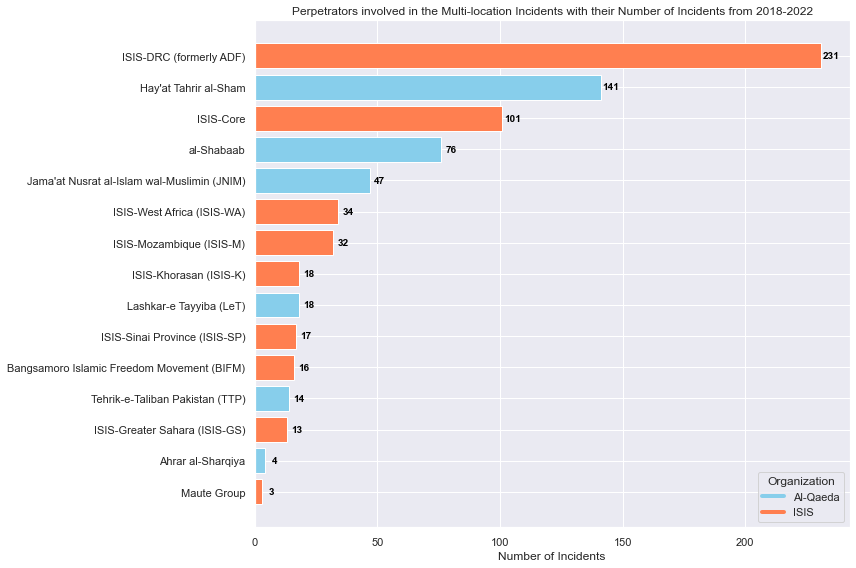

In [69]:

# Plotting the barh graph
plt.figure(figsize=(12, 8))
colors = multiloc['affiliated_organization'].map({'Al-Qaeda': 'skyblue', 'ISIS': 'coral'})
ax= plt.barh(multiloc['perp_name'], multiloc['count_multilocation'], color=colors)
plt.title('Perpetrators involved in the Multi-location Incidents with their Number of Incidents from 2018-2022')
plt.xlabel('Number of Incidents')
#plt.ylabel('Perpetrator Name')
handles = [plt.Line2D([0], [0], color='skyblue', lw=4, label='Al-Qaeda'), plt.Line2D([0], [0], color='coral', lw=4, label='ISIS')]
plt.legend(handles=handles,title="Organization")
plt.grid("TRUE",axis='x')
for bar in ax:
            width = bar.get_width()
            plt.text(width + 4,        # Set the text at 4 units right of the bar
                     bar.get_y() + bar.get_height() / 2,  # Y coordinate + height / 2
                     '{:1.0f}'.format(width),             # Format the value
                     ha="center",                          # Horizontal alignment
                     va="center",fontweight="bold", fontsize=10, color="black")  # Vertical alignment
plt.tight_layout()
plt.show()


In [70]:
org_multiloc_query="select affiliated_organization,incident_year, count(is_multi_location) as count_multilocation from GRID_PERPS_ISIS_ALQAIDA group by affiliated_organization,incident_year,is_multi_location having is_multi_location =1 order by incident_year,count_multilocation;"
org_multiloc=pd.read_sql_query(org_multiloc_query,cnn)
org_multiloc

affiliated_organization  incident_year  count_multilocation
0                    ISIS           2018                   68
1                Al-Qaeda           2018                   72
2                Al-Qaeda           2019                   57
3                    ISIS           2019                   62
4                Al-Qaeda           2020                   61
5                    ISIS           2020                   95
6                Al-Qaeda           2021                   56
7                    ISIS           2021                  141
8                Al-Qaeda           2022                   54
9                    ISIS           2022                   99

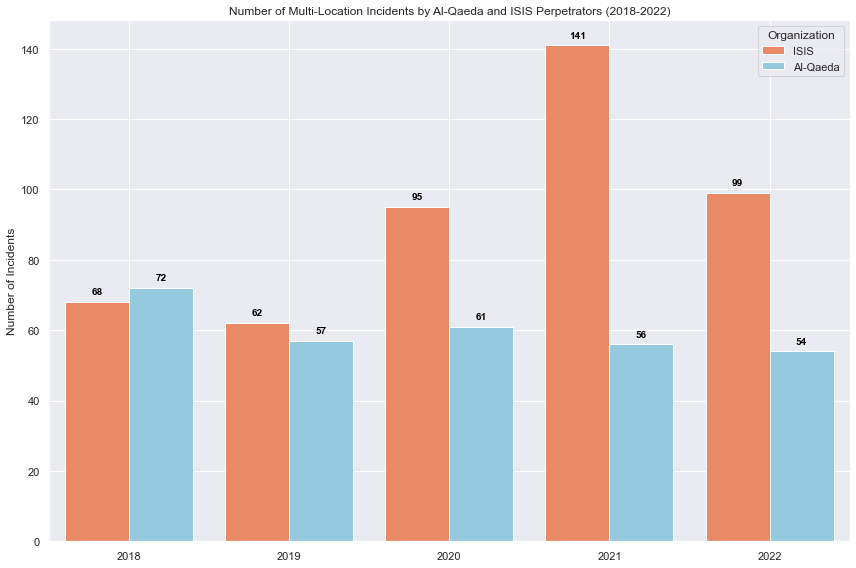

In [71]:
colors = multiloc['affiliated_organization'].map({'Al-Qaeda': 'skyblue', 'ISIS': 'coral'})
# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=org_multiloc, x="incident_year", y="count_multilocation", hue="affiliated_organization", palette=['coral','skyblue'])

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',fontweight="bold", fontsize=10, color="black", xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.legend(title="Organization")
plt.title("Number of Multi-Location Incidents by Al-Qaeda and ISIS Perpetrators (2018-2022)")
plt.grid("TRUE")
plt.xlabel("")
plt.ylabel("Number of Incidents")

plt.tight_layout()
plt.show()


In [72]:
country_count_query="select country_genc_txt, count(country_genc_txt) as no_of_incidents from GRID_PERPS_ISIS_ALQAIDA group by country_genc_txt order by no_of_incidents desc;"
country_count=pd.read_sql_query(country_count_query,cnn)
country_count

country_genc_txt  no_of_incidents
0            SOMALIA             1832
1              SYRIA             1793
2               IRAQ             1619
3   CONGO (KINSHASA)             1044
4            NIGERIA              358
5         MOZAMBIQUE              326
6        AFGHANISTAN              266
7              EGYPT              256
8               MALI              255
9              INDIA              227
10             KENYA              200
11       PHILIPPINES              197
12          PAKISTAN              180
13      BURKINA FASO               94
14             NIGER               60
15          CAMEROON               16
16          ETHIOPIA                7
17            UGANDA                6
18              CHAD                6
19           LEBANON                5
20        TAJIKISTAN                4
21             YEMEN                3
22            RUSSIA                3
23        UZBEKISTAN                2
24            JORDAN                2
25              IRAN                2
26            TURKEY                1
27              TOGO                1
28          TANZANIA                1
29      SAUDI ARABIA                1
30           MOROCCO                1
31             LIBYA                1
32            ISRAEL                1
33            FRANCE                1
34             BENIN                1
35           ALGERIA                1

In [73]:
!pip install geopandas matplotlib

In [74]:
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

In [75]:
# Since we cannot install new packages or access external data in this environment, I will just provide
# a sample code snippet that you could use in a local environment with geopandas installed and access
# to a shapefile or GeoJSON file for country boundaries.

# Sample code for creating a geospatial plot (Choropleth Map)

# You would need to install geopandas and matplotlib if you haven't already:


# Load the shapefile or GeoJSON file that contains the geometry information for countries
# This file would typically be stored on your local machine or accessed from a URL
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the data to a DataFrame
df_geo = pd.DataFrame(country_count)
#df_geo.head()

# Check the column names
print(world.columns)

# Ensure df_geo has the correct columns
print(df_geo.columns)

<ipython-input-75-199018beceb1>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')
Index(['country_genc_txt', 'no_of_incidents'], dtype='object')


<ipython-input-76-3b84fbcb52a1>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


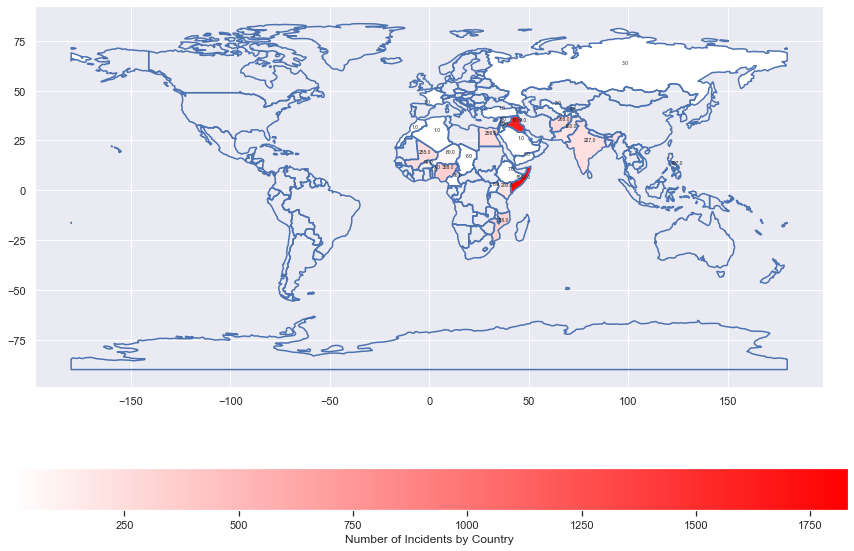

In [76]:
# Since we cannot install new packages or access external data in this environment, I will just provide
# a sample code snippet that you could use in a local environment with geopandas installed and access
# to a shapefile or GeoJSON file for country boundaries.

# Sample code for creating a geospatial plot (Choropleth Map)

# You would need to install geopandas and matplotlib if you haven't already:


# Load the shapefile or GeoJSON file that contains the geometry information for countries
# This file would typically be stored on your local machine or accessed from a URL
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

# Convert the data to a DataFrame
df_geo = pd.DataFrame(country_count)
#df_geo.head()

standardized_country_names = {'SYRIA':'Syrian Arab Republic',
                              'SOMALIA':'Somalia',
                              'IRAQ':'Iraq',
                              'CONGO (KINSHASA)':'Democratic Republic of the Congo',
                              'NIGERIA':'Nigeria',
                              'MOZAMBIQUE':'Mozambique',
                              'MALI':'Mali',
                              'AFGHANISTAN':'Afghanistan',
                              'EGYPT':'Egypt',
                              'INDIA':'India',
                              'KENYA':'Kenya',
                              'PAKISTAN':'Pakistan',
                              'PHILIPPINES':'Philippines',
                              'BURKINA FASO':'Burkina Faso',
                              'NIGER':'Niger',
                              'RUSSIA':'Russia',
                              'CAMEROON':'Cameroon',
                              'YEMEN':'Yemen',
                              'UGANDA':'Uganda',
                              'ETHIOPIA':'Ethiopia',
                              'CHAD':'Chad',
                              'LEBANON':'Lebanon',
                              'TAJIKISTAN':'Tajikistan',
                              'FRANCE':'France',
                              'BENIN':'Benin',
                              'UZBEKISTAN':'Uzbekistan',
                              'JORDAN':'Jordan',
                              'INDONESIA':'Indonesia',
                              'IRAN':'Iran (Islamic Republic of)',
                              'ALGERIA':'Algeria',
                              'SAUDI ARABIA':'Saudi Arabia',
                              'LIBYA':'Libyan Arab Jamahiriya',
                              'MOROCCO':'Morocco',
                              'ISRAEL':'Israel',
                              'TOGO':'Togo',
                              'TURKEY':'Turkey',
                              'TANZANIA':'United Republic of Tanzania'
}

df_geo['country_genc_txt'] = df_geo['country_genc_txt'].replace(standardized_country_names)

# Define a colormap: white to red, where white corresponds to the lower values
# and red corresponds to the higher values
cmap = LinearSegmentedColormap.from_list('white_to_red', ['white', 'red'], N=256)


# Merge the geodataframe with the world dataframe
world = world.merge(df_geo, how='left', left_on='name', right_on='country_genc_txt')
world.sort_values('name')


# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='no_of_incidents', ax=ax, legend=True,
           cmap=cmap,  # Use the colormap defined above
           legend_kwds={'label': "Number of Incidents by Country",
                        'orientation': "horizontal"})

# Annotate the countries with the incident count
for idx, row in world.iterrows():
    # Skip rows with missing data
    if pd.isnull(row['no_of_incidents']):
        continue
    
    # Get the position for the annotation (the centroid of the polygon)
    # Note: This is a simplification, centroids can sometimes fall outside the polygon
    # especially for complex shapes, but it's a good start for annotation
    centroid = row['geometry'].centroid
    ax.annotate(text=row['no_of_incidents'], 
                xy=(centroid.x, centroid.y),
                xytext=(3, 3),  # Small offset to avoid overlapping the country boundary
                textcoords='offset points',
                fontsize=5,  # Smaller font size to ensure the text fits well in small countries
                ha='center')

plt.show()

# This code would not run here due to the limitations, but it should work in a local Jupyter
# notebook or Python script with the appropriate files and libraries installed.

# Since we can't run this code, I'll provide a placeholder output.
#print("This is a placeholder for the choropleth map output.")


<ipython-input-78-3bffa6cbaef9>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
D:\Anaconda\lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


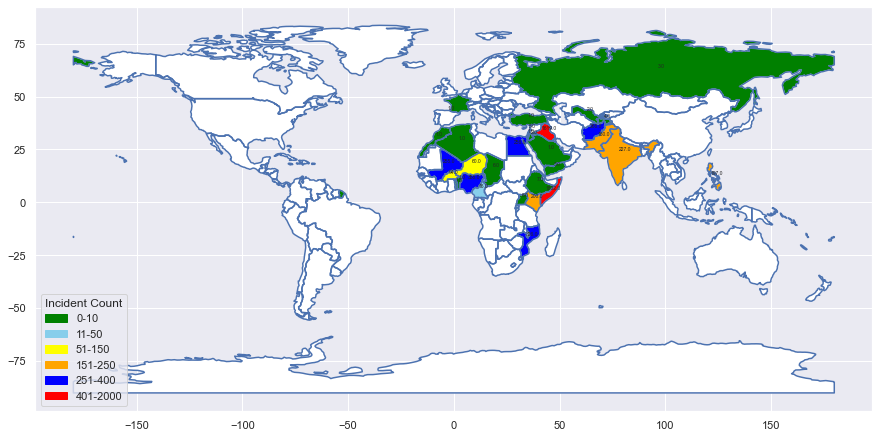

In [78]:
# Since we cannot install new packages or access external data in this environment, I will just provide
# a sample code snippet that you could use in a local environment with geopandas installed and access
# to a shapefile or GeoJSON file for country boundaries.

# Sample code for creating a geospatial plot (Choropleth Map)

# You would need to install geopandas and matplotlib if you haven't already:
import matplotlib.patches as mpatches

# Load the shapefile or GeoJSON file that contains the geometry information for countries
# This file would typically be stored on your local machine or accessed from a URL
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

# Convert the data to a DataFrame
df_geo = pd.DataFrame(country_count)
#df_geo.head()

standardized_country_names = {'SYRIA':'Syrian Arab Republic',
                              'SOMALIA':'Somalia',
                              'IRAQ':'Iraq',
                              'CONGO (KINSHASA)':'Democratic Republic of the Congo',
                              'NIGERIA':'Nigeria',
                              'MOZAMBIQUE':'Mozambique',
                              'MALI':'Mali',
                              'AFGHANISTAN':'Afghanistan',
                              'EGYPT':'Egypt',
                              'INDIA':'India',
                              'KENYA':'Kenya',
                              'PAKISTAN':'Pakistan',
                              'PHILIPPINES':'Philippines',
                              'BURKINA FASO':'Burkina Faso',
                              'NIGER':'Niger',
                              'RUSSIA':'Russia',
                              'CAMEROON':'Cameroon',
                              'YEMEN':'Yemen',
                              'UGANDA':'Uganda',
                              'ETHIOPIA':'Ethiopia',
                              'CHAD':'Chad',
                              'LEBANON':'Lebanon',
                              'TAJIKISTAN':'Tajikistan',
                              'FRANCE':'France',
                              'BENIN':'Benin',
                              'UZBEKISTAN':'Uzbekistan',
                              'JORDAN':'Jordan',
                              'INDONESIA':'Indonesia',
                              'IRAN':'Iran (Islamic Republic of)',
                              'ALGERIA':'Algeria',
                              'SAUDI ARABIA':'Saudi Arabia',
                              'LIBYA':'Libyan Arab Jamahiriya',
                              'MOROCCO':'Morocco',
                              'ISRAEL':'Israel',
                              'TOGO':'Togo',
                              'TURKEY':'Turkey',
                              'TANZANIA':'United Republic of Tanzania'
}

df_geo['country_genc_txt'] = df_geo['country_genc_txt'].replace(standardized_country_names)

# Define a colormap: white to red, where white corresponds to the lower values
# and red corresponds to the higher values
cmap = LinearSegmentedColormap.from_list('white_to_red', ['white', 'red'], N=256)


# Merge the geodataframe with the world dataframe
world = world.merge(df_geo, how='left', left_on='name', right_on='country_genc_txt')
world.sort_values('name')

def color_mapper(value):
    if pd.isna(value):
        return 'white'  # Color for missing data
    elif value <= 10:
        return 'green'
    elif value <= 50:
        return 'skyblue'
    elif value <= 150:
        return 'yellow'
    elif value <= 250:
        return 'orange'
    elif value <= 400:
        return 'blue'
    elif value > 400 and value <= 2000:
        return 'red'

world['color'] = world['no_of_incidents'].apply(color_mapper)


# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(color=world['color'],column='no_of_incidents', ax=ax, legend=True,
           #cmap=cmap,  # Use the colormap defined above
           legend_kwds={'label': "Number of Incidents by Country",
                        'orientation': "horizontal"})

#Create legend handles
legend_handles = [
    mpatches.Patch(color='green', label='0-10'),
    mpatches.Patch(color='skyblue', label='11-50'),
    mpatches.Patch(color='yellow', label='51-150'),
    mpatches.Patch(color='orange', label='151-250'),
    mpatches.Patch(color='blue', label='251-400'),
    mpatches.Patch(color='red', label='401-2000'),
]


#Annotate the countries with the incident count
for idx, row in world.iterrows():
    # Skip rows with missing data
    if pd.isnull(row['no_of_incidents']):
        continue
    
    # Get the position for the annotation (the centroid of the polygon)
    # Note: This is a simplification, centroids can sometimes fall outside the polygon
    # especially for complex shapes, but it's a good start for annotation
    centroid = row['geometry'].centroid
    ax.annotate(text=row['no_of_incidents'], 
                xy=(centroid.x, centroid.y),
                xytext=(3, 3),  # Small offset to avoid overlapping the country boundary
                textcoords='offset points',
                fontsize=5,  # Smaller font size to ensure the text fits well in small countries
                ha='center')

#Add the legend to the plot
ax.legend(handles=legend_handles, title='Incident Count',loc='lower left')

plt.show()

# This code would not run here due to the limitations, but it should work in a local Jupyter
# notebook or Python script with the appropriate files and libraries installed.

# Since we can't run this code, I'll provide a placeholder output.
#print("This is a placeholder for the choropleth map output.")
